# Index MongoDB

In [76]:
import mongowrapper.MongoWrapper as mdb
import numpy as np
import os
from library import Library
import pickle as p
def addToMongoDB(db_instance, my_dict):
    db_instance.save(my_dict)
    return db_instance

def loadOneBinary(funcnamepath, embFile):
    names = p.load(open(funcnamepath, 'r'))
    data = p.load(open(embFile, 'r'))
        #self.ind2emb=dict()
    funcName2emb=dict()
    for i in range(len(names)):
        funcName2emb[names[i]]=data[i]
    return funcName2emb
            
def build2gramMongodb(db, folder, lib):
    emb_path = os.path.join(path_lib, folder, lib+'.so.ida.emb')
    nam_path = os.path.join(path_lib, folder, lib+'.so.ida_filted1.nam')
    nam_path_full = os.path.join(path_lib, folder, lib+'.so.ida.nam')
    names = p.load(open(nam_path, 'r'))
    #names_full = p.load(open(nam_path,'r'))
    #data = p.load(open(emb_path, 'r'))
    func2emb = loadOneBinary(nam_path_full, emb_path)
    for i in range(len(names)):
        data = func2emb[names[i]]
        my_dict = {"name": names[i], "data": data, "version": folder}
        db.save(my_dict)

    print('load ' + lib + ',' + folder)

In [78]:
libraryName = 'libcrypto'
db = mdb('oss', libraryName + '_collection')
global path_lib
path_lib = '/home/yijiufly/Downloads/codesearch/data/openssl'
for folder in os.listdir(path_lib):
    build2gramMongodb(db, folder,libraryName)
    

load libcrypto,openssl-OpenSSL_1_0_2g
load libcrypto,openssl-OpenSSL_0_9_7j
load libcrypto,openssl-OpenSSL_1_0_0d
load libcrypto,openssl-OpenSSL_0_9_8h
load libcrypto,openssl-OpenSSL_1_0_1d
load libcrypto,openssl-OpenSSL_0_9_7i
load libcrypto,openssl-OpenSSL_0_9_8a
load libcrypto,openssl-OpenSSL_0_9_7h
load libcrypto,openssl-OpenSSL_0_9_8u
load libcrypto,openssl-OpenSSL_1_0_0f
load libcrypto,openssl-OpenSSL_1_1_0a
load libcrypto,openssl-OpenSSL_0_9_8b
load libcrypto,openssl-OpenSSL_1_0_1m
load libcrypto,openssl-OpenSSL_1_1_0b
load libcrypto,openssl-OpenSSL_1_0_1q
load libcrypto,openssl-OpenSSL_0_9_7e
load libcrypto,openssl-OpenSSL_0_9_7g
load libcrypto,openssl-OpenSSL_1_0_0t
load libcrypto,openssl-OpenSSL_0_9_7
load libcrypto,openssl-OpenSSL_1_0_2f
load libcrypto,openssl-OpenSSL_1_0_1t
load libcrypto,openssl-OpenSSL_1_0_2j
load libcrypto,openssl-OpenSSL_1_0_1i
load libcrypto,openssl-OpenSSL_0_9_8y
load libcrypto,openssl-OpenSSL_0_9_8n
load libcrypto,openssl-OpenSSL_1_1_0c
load libcrypt

In [71]:
db.connection.drop_database('oss')

# Search MongoDB

In [36]:
db.load({"name":'_init'})


[{u'_id': ObjectId('5d549bfd6c1581c39db9fc19'),
  u'_npObjectIDs': [ObjectId('5d549bfd6c1581c39db9fc17')],
  u'data': array([ 1.3143042 ,  0.6370126 , -1.4398222 ,  0.5033144 ,  1.5617046 ,
         -0.760426  ,  0.6207162 , -0.474633  , -1.1031591 , -0.50029445,
         -0.13191916,  0.22171645,  0.4471913 ,  0.70698416,  0.9043882 ,
          0.8879889 ,  0.44077158, -0.32081613,  1.3458557 , -1.1199375 ,
         -3.1099312 , -1.6830784 ,  1.3339134 ,  1.138686  ,  0.7198933 ,
          0.5310473 ,  1.6754402 , -0.9897256 ,  2.1244118 , -0.41577917,
          2.0193665 , -0.17490907,  2.6298406 , -0.95096815, -0.22085229,
         -0.6524981 ,  1.1267282 ,  2.6346803 ,  0.7323775 , -2.447609  ,
          0.51820856, -0.6220708 , -0.09495795, -0.05529763, -0.91369486,
         -0.08805767, -1.020882  , -0.0341909 ,  1.5662508 ,  1.5425507 ,
          1.0295261 ,  0.54892987, -1.6760607 ,  0.7600167 ,  0.16562451,
         -1.0952786 ,  0.32421172,  0.8816155 , -0.8026448 , -1.043396

# check the quality of the embeddings

## Draw CDF

In [12]:
import pickle as p
name = 'nginx-{openssl-1.0.1d}{zlib-1.2.11}'
#dir = '/home/yijiufly/Downloads/codesearch/data/versiondetect/test3/nginx/nginx-{openssl-1.0.1j}{zlib-1.2.7.3}/'
dir = '/home/yijiufly/Downloads/codesearch/data/versiondetect/test3/nginx/'+name+'/'
embfiles = name + '.ida_newmodel.emb'
namfiles = name + '.ida_newmodel_withsize.nam'
filted = 1
def loadOneBinary(funcnamepath, embFile, filted_size=0):
    names = p.load(open(funcnamepath, 'r'))
    data = p.load(open(embFile, 'r'))
    funcName2emb=dict()
    for i in range(len(data)):
        (name, size) = names[i]
        if size > filted_size:
            funcName2emb[name]=data[i]
    return funcName2emb

In [19]:
func2emb_test = loadOneBinary(dir+namfiles, dir+embfiles, filted)
#dir_openssl = '/home/yijiufly/Downloads/codesearch/data/openssl/openssl-OpenSSL_1_0_1l/'
dir_openssl = '/home/yijiufly/Downloads/codesearch/data/openssl/openssl-OpenSSL_1_0_1d/'
emb = 'libcrypto.so.ida_newmodel.emb'
nam = 'libcrypto.so.ida_newmodel_withsize.nam'
#name_filted = p.load(open(dir_openssl+'libcrypto.so.ida_filted1.nam','r'))
func2emb_openssl = loadOneBinary(dir_openssl+nam, dir_openssl+emb, filted)
dir_zlib = '/home/yijiufly/Downloads/codesearch/data/nginx/openssl-1.0.1d/objfiles/'
emb = 'x_pubkey.o.ida_newmodel.emb'
nam = 'x_pubkey.o.ida_newmodel_withsize.nam'
#name_filted = p.load(open(dir_openssl+'libcrypto.so.ida_filted1.nam','r'))
func2emb_zlib = loadOneBinary(dir_zlib+nam, dir_zlib+emb, filted)

In [28]:
import numpy as np
from collections import defaultdict
distribution=[]
count = 0
count_openssl = 0
for key in func2emb_test.keys():
    if key in func2emb_zlib:# and key in name_filted:
        count_openssl += 1
        a=func2emb_test[key]
        b=func2emb_zlib[key]
        from numpy.linalg import norm
        result = np.inner(a, b)/(norm(a)*norm(b))
        if not np.isnan(result):
            distribution.append(result)
        if result < 0.9:
            count +=1
            print key, result
print count
print count_openssl
print len(func2emb_test.keys())

pkey_gost_mac_ctrl 0.63294125
mime_param_cmp 0.89708036
def_init_WIN32 0.873341
EVP_PKEY_size 0.888899
DES_ecb3_encrypt 0.72838473
RSA_padding_add_none 0.83222854
e_rsax_rsa_finish 0.74107784
fill_GOST2001_params 0.89955026
surewarehk_rand_bytes 0.8327094
keyUnwrapCryptoPro 0.51149076
ERR_load_GOST_strings 0.8705248
EC_POINT_set_compressed_coordinates_GF2m 0.87727207
DES_check_key_parity 0.8231731
GENERAL_NAME_cmp 0.6654716
ERR_load_RAND_strings 0.89790964
surewarehk_rand_seed 0.78913856
idea_ecb_encrypt 0.6145661
aes_gcm_ctrl 0.39299738
EVP_PKEY_paramgen_init 0.8938541
gost_control_func 0.8398353
DSA_SIG_free 0.84063214
X509_REQ_set_pubkey 0.83043724
asn1_item_combine_free 0.82172936
DES_options 0.78641045
asn1_bio_write 0.8934602
ERR_unload_GOST_strings 0.79530007
cms_cb 0.87434727
RSA_generate_key 0.8921302
RSA_flags 0.8854372
gost_set_default_param 0.8105567
EVP_PKEY_paramgen 0.88261193
PKCS7_dataFinal 0.5404321
enc_free 0.836057
OPENSSL_init 0.7601625
private_Camellia_set_key 0.89

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  after removing the cwd from sys.path.


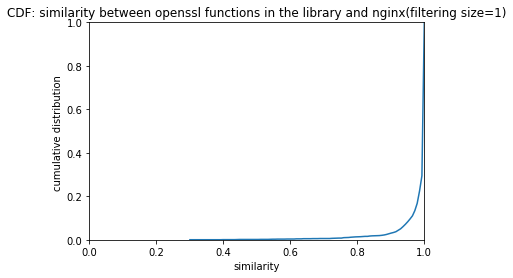

In [29]:
import matplotlib.pyplot as plt
def cdf(x, plot=True):
    num_bins = 100
    counts, bin_edges = np.histogram (x, bins=num_bins, normed=True)
    cdf = np.cumsum (counts)
    plt.axis([0, 1, 0, 1])
    plt.title('CDF: similarity between openssl functions in the library and nginx(filtering size=1)')
    plt.xlabel('similarity')
    plt.ylabel('cumulative distribution ')
    plt.plot (bin_edges[1:], cdf/cdf[-1])
# x=np.array(distribution)
# x.sort()
# print len(x)
cdf(np.array(distribution))


In [48]:
import pickle as p
import os
dir = '/home/yijiufly/Downloads/codesearch/data/versiondetect/test2/idafiles/e907458106a1e3ccaa51a6f7ebc59137f07c3518dca7c9cdae275e53729a3dca/'
embfiles = 'nginx-{openssl-1.0.1j}{zlib-1.2.7.3}.ida.emb'
namfiles = 'nginx-{openssl-1.0.1j}{zlib-1.2.7.3}.ida.nam'
func2emb_test2 = loadOneBinary(dir+namfiles, dir+embfiles)
distribution2=[]
openssl_dir = '/home/yijiufly/Downloads/codesearch/data/versiondetect/test2/funcemb_output_openssl/'
func2emb_openssl = os.listdir(openssl_dir)
count = 0
total = 0
for key in func2emb_test.keys():
    filename = 'OpenSSL_1_0_1j_libcrypto.so{' + key + '}.emb'
    if filename in func2emb_openssl:
        a=func2emb_test[key]
        b = p.load(open(openssl_dir+filename, 'r'))
        from numpy.linalg import norm
        result = np.inner(a, b)/(norm(a)*norm(b))
        if not np.isnan(result):
            distribution2.append(result)
        if result > 0.99:
            count += 1
        total += 1
print count, total

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in float_scalars


0 1666


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  after removing the cwd from sys.path.


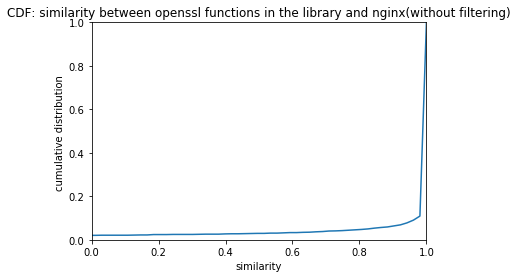

In [42]:
cdf(np.array(distribution2))

## Draw ROC

In [20]:
import sys
sys.path.insert(0, './embedding_w2v')
from embedding_w2v.embedding import Embedding
emb = Embedding()

siamese model  object initialized
defined training operations
initializing global variables
INFO:tensorflow:Restoring parameters from /home/yijiufly/Downloads/codesearch/embedding_w2v/model/model.ckpt


In [22]:
import numpy as np
import matplotlib.pyplot as plt
def drawROC(resultMat, name_test, name_lib, linelabel):
    rank_index_list = []
    length = len(resultMat[0])
    for s in resultMat:
        a = sorted(range(len(s)), key=lambda k: s[k], reverse=True)
        rank_index_list.append(a)
    del resultMat
    func_counts = len(rank_index_list)
    total_tp = []
    total_fp = []
    for func in range(func_counts):
        real_name = name_test[func]
        tp = [0]
        fp = [0]
        for rank, idx in enumerate(rank_index_list[func]):
            if name_lib[idx] == real_name:
                tp.append(1)
                fp.append(fp[-1])
            else:
                tp.append(max(tp[-1], 0))
                fp.append(fp[-1] + 1)
            #if rank == 30 and tp[-1] == 0:
            #    print func, real_name
                    
        total_tp.append(tp)
        total_fp.append(fp)
    num_positive = func_counts
    num_negative = func_counts * length - num_positive
    total_tp = np.sum(total_tp, axis=0, dtype=np.float) / func_counts
    total_fp = np.sum(total_fp, axis=0, dtype=np.float) / num_negative
    print total_tp[:30], total_fp[:30]
    plt.figure(1)
    plt.title('ROC')
    plt.plot(total_fp, total_tp, 'r-', label=linelabel)
    # plt.plot(total_fp2, total_tp2, 'b-', label='acfg_0')

    plt.legend(loc='lower right')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return rank_index_list

In [18]:
#draw ROC for functions
import pickle as p
name = 'nginx-{openssl-1.0.1d}{zlib-1.2.11}'
#dir = '/home/yijiufly/Downloads/codesearch/data/versiondetect/test3/nginx/nginx-{openssl-1.0.1d}{zlib-1.2.11}/w2v/'
dir = '/home/yijiufly/Downloads/codesearch/Gemini/testingdataset/test/'
embfiles = name + '.ida_newmodel.emb'
namfiles = name + '.ida_newmodel_withsize.nam'
filted = 1
def loadOneBinary(funcnamepath, embFile, filted_size=0):
    names = p.load(open(funcnamepath, 'r'))
    data = p.load(open(embFile, 'r'))
    funcName2emb=dict()
    for i in range(len(data)):
        (name, size) = names[i]
        if size > filted_size:
            funcName2emb[name]=data[i]
    return funcName2emb
func2emb_test = loadOneBinary(dir+namfiles, dir+embfiles, filted)
#dir_openssl = '/home/yijiufly/Downloads/codesearch/Gemini/testingdataset/database/'
dir_openssl = '/home/yijiufly/Downloads/codesearch/data/openssl/'
#folder = '101d/'
folder = 'openssl-OpenSSL_1_0_1d/emb_w2v/'
embfile = 'libcrypto.so.ida_newmodel.emb'
nam = 'libcrypto.so.ida_newmodel_withsize.nam'
sslembfile = 'libssl.so.ida_newmodel.emb'
sslnam = 'libssl.so.ida_newmodel_withsize.nam'
func2emb_ssl = loadOneBinary(dir_openssl+folder+sslnam, dir_openssl+folder+sslembfile, filted)
#name_filted = p.load(open(dir_openssl+'libcrypto.so.ida_filted1.nam','r'))
func2emb_openssl = loadOneBinary(dir_openssl+folder+nam, dir_openssl+folder+embfile, filted)
name_test=[]
emb_test=[]
for key in func2emb_test.keys():
    if key in func2emb_openssl.keys() or key in func2emb_ssl.keys():
        name_test.append(key)
        emb_test.append(func2emb_test[key])

In [7]:
print len(name_test)
print len(func2emb_test.keys())

2609
4597


openssl-OpenSSL_1_0_2g
openssl-OpenSSL_0_9_7j
openssl-OpenSSL_1_0_0d
openssl-OpenSSL_0_9_8h
openssl-OpenSSL_1_0_1d
openssl-OpenSSL_0_9_7i
openssl-OpenSSL_0_9_8a
openssl-OpenSSL_0_9_7h
openssl-OpenSSL_0_9_8u
openssl-OpenSSL_1_0_0f
[0.         0.75239555 0.77539287 0.78727482 0.79685703 0.80452281
 0.80950556 0.81448831 0.81947106 0.82292066 0.82752012 0.83518589
 0.83671905 0.8382522  0.83901878 0.84093522 0.84131851 0.84323496
 0.84553469 0.84745113 0.84821771 0.848601   0.84975086 0.85166731
 0.85205059 0.85320046 0.85358375 0.85435033 0.85550019 0.85626677] [0.00000000e+00 9.84549867e-06 2.09254949e-05 3.45811710e-05
 4.95780297e-05 6.98024519e-05 9.12156495e-05 1.13573771e-04
 1.39604904e-04 1.65727481e-04 1.92749260e-04 2.29967074e-04
 2.67642109e-04 3.05103774e-04 3.42885494e-04 3.80575770e-04
 4.18509897e-04 4.56444024e-04 4.94698207e-04 5.32891426e-04
 5.71176089e-04 6.10161826e-04 6.49086599e-04 6.87950410e-04
 7.26951387e-04 7.65967604e-04 8.05166710e-04 8.44442020e-04
 8.8364

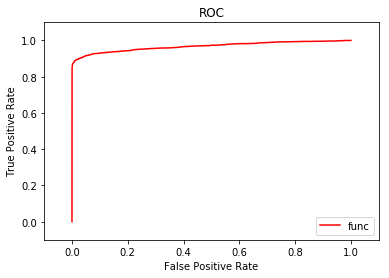

In [23]:
import os
import numpy as np
import pdb
from collections import defaultdict
name_openssl_all = ['0']
resultMat_all = [[0] for i in range(len(name_test))]
acfgs_all = []
#for folder in os.listdir(dir_openssl)[0], os.listdir(dir_openssl)[1], os.listdir(dir_openssl)[2], os.listdir(dir_openssl)[4], os.listdir(dir_openssl)[55]:
for folder in os.listdir(dir_openssl)[:10]:
    print folder
    embfile = '/libcrypto.so.ida_newmodel.emb'
    nam = '/libcrypto.so.ida_newmodel_withsize.nam'
    sslembfile = '/libssl.so.ida_newmodel.emb'
    sslnam = '/libssl.so.ida_newmodel_withsize.nam'
    idafile = '/libcrypto.so.ida'
    sslidafile = '/libssl.so.ida'
    func2emb_ssl = loadOneBinary(dir_openssl+folder+sslnam, dir_openssl+folder+sslembfile, filted)
    name_openssl = func2emb_ssl.keys()
    emb_openssl = func2emb_ssl.values()
    #name_filted = p.load(open(dir_openssl+'libcrypto.so.ida_filted1.nam','r'))
    func2emb_openssl = loadOneBinary(dir_openssl+folder+nam, dir_openssl+folder+embfile, filted)

    name_openssl.extend(func2emb_openssl.keys())
    emb_openssl.extend(func2emb_openssl.values())
    
    name_openssl_all.extend(name_openssl)
    resultMat = emb.test_similarity(emb_test, emb_openssl)
    resultMat_all = np.concatenate((resultMat_all, resultMat), axis = 1)
rank = drawROC(resultMat_all, name_test, name_openssl_all, 'func')
# tp = 0
# fp = 0
# counter_samples = defaultdict(list)
# for i, s in enumerate(resultMat_all):
#     a = sorted(range(len(s)), key = lambda k: s[k], reverse = True)
#     prediction = []
#     for j in range(20):
#         #pdb.set_trace()
#         if s[a[j]] > 0.99:
#             prediction.append(name_openssl_all[a[j]])
    
#     if name_test[i] in prediction:
#         tp += 1
#     elif len(prediction) > 0:
#         fp += 1
#         counter_samples[name_test[i]].extend(prediction)
        
# print tp, fp
#print counter_samples

In [53]:
import os
from shutil import move
path = '/home/yijiufly/Downloads/codesearch/data/versiondetect/test3/nginx/'
for version in os.listdir(path):
    targetpath = path + version + '/w2v'
    os.mkdir(targetpath)
    move(path + version + '*.ida*', targetpath)

12

In [28]:
d = defaultdict(list)
if 'a' in d.keys():
    print True
print d

defaultdict(<type 'list'>, {})


In [3]:
# draw ROC for 2-grams
from binary import TestBinary
from library import Library
import os
name = 'nginx-{openssl-1.0.1d}{zlib-1.2.11}'
#dir = '/home/yijiufly/Downloads/codesearch/data/versiondetect/test3/nginx/nginx-{openssl-1.0.1j}{zlib-1.2.7.3}/'
dir = '/home/yijiufly/Downloads/codesearch/data/versiondetect/test3/nginx/'+name+'/'
filter_size = 1
dotPath = os.path.join(dir, name + '_bn.dot')
embPath = os.path.join(dir, name + '.ida.emb')
namPath = os.path.join(dir, name + '.ida_newmodel_withsize.nam')
namPathFull = os.path.join(dir,  name + '.ida.nam')
testbin = TestBinary(name, dotPath, embPath, namPath, filter_size)
testbin.buildNGram(namPathFull)

path_lib = '/home/yijiufly/Downloads/codesearch/data/openssl'
lib='libcrypto'
folder = 'openssl-OpenSSL_1_0_1d'
dotfile = lib+'.so_bn.dot'
dot_path = os.path.join(path_lib, folder, dotfile)
libraryName = folder.split('-')[1] + '_' + dotfile.rsplit('.',1)[0]
emb_path = os.path.join(path_lib, folder, lib+'.so.ida.emb')
nam_path = os.path.join(path_lib, folder, lib+'.so.ida_newmodel_withsize.nam')
nam_path_full = os.path.join(path_lib, folder, lib+'.so.ida.nam')
libitem = Library(libraryName, dot_path, emb_path, nam_path,filter_size)
libitem.buildNGram(nam_path_full)

init testing binary
graph loaded
/home/yijiufly/Downloads/codesearch/data/versiondetect/test3/nginx/nginx-{openssl-1.0.1d}{zlib-1.2.11}/nginx-{openssl-1.0.1d}{zlib-1.2.11}_bn.dot
edges loaded
n-gram loaded
graph loaded
/home/yijiufly/Downloads/codesearch/data/openssl/openssl-OpenSSL_1_0_1d/libcrypto.so_bn.dot
edges loaded
n-gram loaded


[0.         0.64353612 0.7031052  0.72671103 0.74271229 0.75269328
 0.76029785 0.76869455 0.77376426 0.77740811 0.78073511 0.78342839
 0.78612167 0.78833967 0.79103295 0.79293409 0.79546895 0.79816223
 0.80038023 0.8024398  0.80465779 0.80624208 0.80782636 0.80988593
 0.81162864 0.81368821 0.81479721 0.81622307 0.81685678 0.81796578] [0.00000000e+00 4.37593762e-05 1.59109092e-04 2.78893091e-04
 3.99688418e-04 5.21222792e-04 6.43048895e-04 7.64738858e-04
 8.86876139e-04 1.00918846e-03 1.13153967e-03 1.25396868e-03
 1.37635880e-03 1.49884615e-03 1.62127516e-03 1.74376252e-03
 1.86621098e-03 1.98863999e-03 2.11112734e-03 2.23363415e-03
 2.35612150e-03 2.47868666e-03 2.60125181e-03 2.72375861e-03
 2.84630431e-03 2.96881112e-03 3.09143461e-03 3.21401921e-03
 3.33670105e-03 3.45932455e-03]


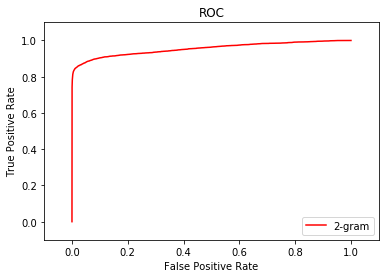

In [5]:
name_test=[]
emb_test=[]
name_openssl=[i[1] for i in libitem.twoGramList]
emb_openssl=[i[0] for i in libitem.twoGramList]
for twogram in testbin.twoGramList:
    if twogram[1] in name_openssl:
        name_test.append(twogram[1])
        emb_test.append(twogram[0])

resultMat = emb.test_similarity(emb_test, emb_openssl)
rank_index_list = drawROC(resultMat, name_test, name_openssl, '2-gram')

[0.         0.64299116 0.69829358 0.72670419 0.74528723 0.75565085
 0.76529974 0.7757527  0.7815599  0.78495488 0.78968998 0.79237023
 0.79567587 0.79826677 0.80166175 0.80380595 0.80639686 0.80889842
 0.81157867 0.8133655  0.81515233 0.81711784 0.81836862 0.82078085
 0.82229965 0.82435451 0.82551595 0.82685607 0.82783883 0.82908961] [0.00000000e+00 2.13458203e-05 7.77551953e-05 1.35740400e-04
 1.94409356e-04 2.53559072e-04 3.12772891e-04 3.71938633e-04
 4.31360781e-04 4.90937842e-04 5.50445459e-04 6.10065254e-04
 6.69658340e-04 7.29283477e-04 7.88871221e-04 8.48533750e-04
 9.08169571e-04 9.67800049e-04 1.02743053e-03 1.08711442e-03
 1.14678764e-03 1.20646085e-03 1.26617680e-03 1.32582330e-03
 1.38552322e-03 1.44519109e-03 1.50491238e-03 1.56462299e-03
 1.62435496e-03 1.68407091e-03]


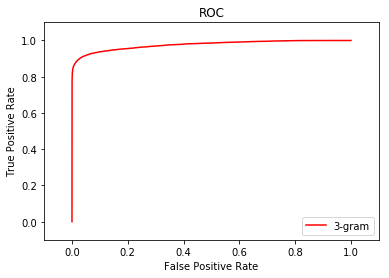

In [10]:
# 3-gram
name_test=[]
emb_test=[]
name_openssl=[i[1] for i in libitem.threeGramList]
emb_openssl=[i[0] for i in libitem.threeGramList]
for twogram in testbin.threeGramList:
    if twogram[1] in name_openssl:
        name_test.append(twogram[1])
        emb_test.append(twogram[0])
resultMat = []
for i in range(0, len(emb_test), 500):
    resultMat.extend(emb.test_similarity(emb_test[i:i+500], emb_openssl))
rank_index_list = drawROC(resultMat, name_test, name_openssl, '3-gram')

16726


In [10]:
resultMat = np.zeros((len(emb_test), len(emb_openssl)))
from collections import defaultdict
name2ind_openssl = defaultdict(int)
for i, name in enumerate(name_openssl):
    name2ind_openssl[name]=i
name2ind_test = defaultdict(int)
for i, name in enumerate(name_test):
    name2ind_test[name]=i
for knn in testkNN:
    testname = knn[0][0]
    if testname in name2ind_test:
        index1 = name2ind_test[testname]
        for openssl in knn[1]:
            opensslname = openssl[0]
            if opensslname in name2ind_openssl:
                index2 = name2ind_openssl[opensslname]
                resultMat[index1, index2] = knn[2]
rank_index_list = drawROC(resultMat, name_test, name_openssl, '3-gram')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """


KeyboardInterrupt: 

0 ('PKCS7_simple_smimecap', 'OBJ_nid2obj')
0 0.9977308
1 ('PKCS7_simple_smimecap', 'ASN1_INTEGER_set')
0 0.99986905
2 ('PKCS7_simple_smimecap', 'ASN1_OBJECT_free')
0 0.99864566
4 ('X509_PURPOSE_get_count', 'sk_num')
2 1.0000001
5 ('RSA_padding_check_PKCS1_type_2', 'ERR_put_error')
0 0.98619556
6 ('RSA_padding_check_PKCS1_type_1', 'ERR_put_error')
0 0.98772174
7 ('PEM_read_bio_Parameters', 'EVP_PKEY_new')
0 0.9992056
8 ('PEM_read_bio_Parameters', 'pem_check_suffix')
0 0.99959326
9 ('PEM_read_bio_Parameters', 'EVP_PKEY_free')
0 0.99876827
10 ('PEM_read_bio_Parameters', 'CRYPTO_free')
0 0.99958324
11 ('PEM_read_bio_Parameters', 'PEM_bytes_read_bio')
0 0.99244386
12 ('PEM_read_bio_Parameters', 'ERR_put_error')
0 0.99146134
13 ('PEM_read_bio_Parameters', 'EVP_PKEY_set_type_str')
0 0.9986799
16 ('BN_mod_add_quick', 'BN_uadd')
0 0.9999993
17 ('BN_mod_add_quick', 'BN_ucmp')
0 0.9999999
18 ('print_qualifiers', 'BIO_printf')
0 0.99360543
19 ('print_qualifiers', 'sk_num')
2 0.9935647
20 ('print_q

575 ('cms_EnvelopedData_init_bio', 'CRYPTO_free')
0 0.99776566
576 ('BIO_set_cipher', 'EVP_CipherInit_ex')
0 0.9976339
577 ('check_policy', 'X509_policy_check')
0 0.99831736
578 ('check_policy', 'sk_value')
0 0.99938214
579 ('check_policy', 'sk_num')
0 0.9993649
580 ('check_policy', 'ERR_put_error')
1 0.9873909
581 ('BN_from_montgomery_word', 'bn_mul_add_words')
0 0.99512434
582 ('BN_from_montgomery_word', 'bn_expand2')
0 0.9988762
583 ('BN_from_montgomery_word', 'bn_sub_words')
0 0.99884874
586 ('BN_GF2m_mod_sqr', 'BN_GF2m_mod_sqr_arr')
6 0.9739199
589 ('BN_mod_exp2_mont', 'BN_is_bit_set')
0 0.9998641
590 ('BN_mod_exp2_mont', 'BN_div')
0 0.99979794
591 ('BN_mod_exp2_mont', 'BN_MONT_CTX_free')
0 0.99986416
592 ('BN_mod_exp2_mont', 'BN_from_montgomery')
0 0.9998643
593 ('BN_mod_exp2_mont', 'BN_MONT_CTX_set')
0 0.99986213
594 ('BN_mod_exp2_mont', 'BN_ucmp')
0 0.9998643
595 ('BN_mod_exp2_mont', 'BN_MONT_CTX_new')
0 0.9998484
596 ('BN_mod_exp2_mont', 'BN_mod_mul_montgomery')
0 0.999864
597

1306 ('ECDH_compute_key', 'ecdh_check')
0 0.9819023
1307 ('BIO_set', 'CRYPTO_free_ex_data')
0 0.97693956
1308 ('BIO_set', 'CRYPTO_new_ex_data')
1 0.97693956
1309 ('SRP_create_verifier', 'BN_bn2bin')
0 0.9968057
1311 ('SRP_create_verifier', 't_fromb64')
0 0.999303
1312 ('SRP_create_verifier', 'BN_free')
0 0.99883133
1315 ('SRP_create_verifier', 'SRP_create_verifier_BN')
0 0.99883705
1316 ('SRP_create_verifier', 'CRYPTO_malloc')
0 0.99881685
1317 ('SRP_create_verifier', 'CRYPTO_free')
0 0.99880904
1318 ('SRP_create_verifier', 't_tob64')
0 0.99772465
1319 ('SRP_create_verifier', 'SRP_get_default_gN')
0 0.9981991
1320 ('v2i_ASN1_BIT_STRING', 'sk_value')
0 0.9975964
1321 ('v2i_ASN1_BIT_STRING', 'sk_num')
0 0.9975618
1322 ('v2i_ASN1_BIT_STRING', 'ERR_add_error_data')
0 0.99756116
1323 ('v2i_ASN1_BIT_STRING', 'ASN1_BIT_STRING_set_bit')
0 0.99822843
1324 ('v2i_ASN1_BIT_STRING', 'ASN1_STRING_type_new')
0 0.9973354
1325 ('v2i_ASN1_BIT_STRING', 'ASN1_STRING_free')
0 0.99769
1326 ('v2i_ASN1_BIT_ST

1 0.9986892
1945 ('engine_free_util', 'ERR_put_error')
0 0.9714436
1946 ('engine_free_util', 'engine_pkey_meths_free')
0 0.9986892
1947 ('engine_free_util', 'CRYPTO_free')
0 0.99946153
1949 ('engine_free_util', 'CRYPTO_free_ex_data')
0 0.9907411
1950 ('SRP_Calc_x', 'EVP_DigestFinal_ex')
0 0.9972113
1951 ('SRP_Calc_x', 'CRYPTO_malloc')
0 0.99811834
1952 ('SRP_Calc_x', 'BN_bn2bin')
1 0.97248095
1954 ('SRP_Calc_x', 'CRYPTO_free')
0 0.9977437
1955 ('SRP_Calc_x', 'EVP_DigestInit_ex')
0 0.99970835
1956 ('SRP_Calc_x', 'EVP_MD_CTX_cleanup')
0 0.99867177
1961 ('PKCS8_encrypt', 'ASN1_STRING_free')
0 0.99916947
1962 ('cms_DigestAlgorithm_find_ctx', 'EVP_MD_CTX_copy_ex')
0 0.99944013
1963 ('cms_DigestAlgorithm_find_ctx', 'X509_ALGOR_get0')
0 0.9988007
1964 ('cms_DigestAlgorithm_find_ctx', 'EVP_MD_CTX_md')
0 0.9985224
1965 ('cms_DigestAlgorithm_find_ctx', 'BIO_next')
0 0.9985244
1966 ('cms_DigestAlgorithm_find_ctx', 'BIO_ctrl')
0 0.9989377
1967 ('cms_DigestAlgorithm_find_ctx', 'ERR_put_error')
3 0.

0 0.997995
2650 ('X509V3_EXT_val_prn', 'sk_value')
0 0.9977205
2651 ('new_dir', 'CRYPTO_malloc')
0 0.9989255
2652 ('new_dir', 'CRYPTO_free')
0 0.9986647
2653 ('new_dir', 'BUF_MEM_new')
0 0.99350774
2657 ('ENGINE_load_private_key', 'ERR_put_error')
2 0.9765041
2658 ('ENGINE_load_private_key', 'CRYPTO_lock')
0 0.9926258
2659 ('ENGINE_get_next', 'CRYPTO_lock')
0 0.98782724
2660 ('ENGINE_get_next', 'ERR_put_error')
6 0.9490763
2662 ('ASN1_seq_unpack', 'd2i_ASN1_SET')
0 0.99945533
2663 ('BN_MONT_CTX_set_locked', 'BN_MONT_CTX_free')
0 0.9894083
2664 ('BN_MONT_CTX_set_locked', 'CRYPTO_lock')
2 0.9778103
2665 ('BN_MONT_CTX_set_locked', 'BN_MONT_CTX_set')
0 0.9972619
2666 ('EVP_PKEY_verify_recover', 'EVP_PKEY_size')
2 0.9991263
2667 ('EVP_PKEY_verify_recover', 'ERR_put_error')
2 0.984532
2668 ('ec_GF2m_simple_group_get_curve', 'BN_copy')
7 0.9719717
2669 ('aes_gcm_init_key', 'CRYPTO_gcm128_init')
0 0.9973317
2670 ('aes_gcm_init_key', 'CRYPTO_gcm128_setiv')
0 0.99981225
2672 ('r2i_pci', 'sk_pop_

3262 ('DH_generate_parameters_ex', 'BN_CTX_end')
0 0.99938685
3263 ('DIST_POINT_set_dpname', 'sk_num')
0 0.9999052
3264 ('DIST_POINT_set_dpname', 'sk_value')
0 0.9999074
3265 ('DIST_POINT_set_dpname', 'X509_NAME_add_entry')
0 0.9999622
3268 ('PKCS5_v2_PBE_keyivgen', 'EVP_CipherInit_ex')
0 0.99636567
3270 ('PKCS5_v2_PBE_keyivgen', 'PKCS5_v2_PBKDF2_keyivgen')
0 0.9973437
3272 ('PKCS5_v2_PBE_keyivgen', 'OBJ_nid2sn')
0 0.9978998
3273 ('PKCS5_v2_PBE_keyivgen', 'ERR_put_error')
1 0.9908107
3274 ('CMAC_Final', 'OPENSSL_cleanse')
0 0.9999939
3275 ('EC_POINT_cmp', 'ERR_put_error')
8 0.95318586
3276 ('camellia_192_cbc_cipher', 'Camellia_cbc_encrypt')
1 0.9985758
3277 ('camellia_256_cfb8_cipher', 'CRYPTO_cfb128_8_encrypt')
0 1.0000001
3278 ('DSO_get_filename', 'ERR_put_error')
0 0.91082495
3279 ('pqueue_new', 'CRYPTO_malloc')
4 0.99448866
3280 ('CRYPTO_new_ex_data', 'CRYPTO_lock')
2 0.9791315
3282 ('TXT_DB_insert', 'lh_insert')
0 0.9993837
3283 ('TXT_DB_insert', 'lh_retrieve')
0 0.9999997
3284 ('

0 0.98478055
3910 ('CMS_SignerInfo_verify_content', 'cms_DigestAlgorithm_find_ctx')
0 0.99752474
3911 ('CMS_SignerInfo_verify_content', 'EVP_DigestFinal_ex')
0 0.99723166
3912 ('CMS_SignerInfo_verify_content', 'OBJ_nid2obj')
0 0.99694383
3913 ('CMS_SignerInfo_verify_content', 'EVP_MD_CTX_cleanup')
0 0.998037
3914 ('CMS_SignerInfo_verify_content', 'ERR_put_error')
2 0.9897298
3915 ('CMS_SignerInfo_verify_content', 'EVP_VerifyFinal')
0 0.99834734
3917 ('SMIME_text', 'sk_pop_free')
0 0.98716193
3918 ('SMIME_text', 'ERR_add_error_data')
0 0.9962834
3919 ('SMIME_text', 'BIO_write')
0 0.9968432
3920 ('SMIME_text', 'sk_value')
0 0.9964498
3921 ('SMIME_text', 'sk_find')
0 0.99058497
3922 ('SMIME_text', 'ERR_put_error')
0 0.98734784
3923 ('SMIME_text', 'mime_parse_hdr')
0 0.99587303
3924 ('SMIME_text', 'BIO_read')
0 0.9968356
3926 ('v2i_POLICY_CONSTRAINTS', 'ERR_add_error_data')
0 0.9894731
3927 ('v2i_POLICY_CONSTRAINTS', 'sk_num')
1 0.9896191
3928 ('v2i_POLICY_CONSTRAINTS', 'sk_value')
0 0.989

4543 ('ec_GFp_mont_group_clear_finish', 'BN_clear_free')
0 0.9972006
4545 ('EVP_PKEY2PKCS8_broken', 'ERR_put_error')
5 0.98298514
4546 ('CMS_SignedData_init', 'OBJ_nid2obj')
0 0.9974646
4547 ('CMS_SignedData_init', 'ASN1_item_new')
4 0.96476626
4549 ('CMS_SignedData_init', 'ASN1_OBJECT_free')
0 0.99834365
4550 ('CMS_SignedData_init', 'ERR_put_error')
3 0.97571313
4551 ('BN_mul', 'BN_CTX_get')
0 0.9998818
4552 ('BN_mul', 'BN_num_bits_word')
0 0.9999095
4553 ('BN_mul', 'bn_expand2')
0 0.99991
4554 ('BN_mul', 'bn_mul_normal')
0 0.99991053
4555 ('BN_mul', 'bn_mul_recursive')
4 0.98389894
4556 ('BN_mul', 'BN_copy')
2 0.99478185
4557 ('BN_mul', 'BN_CTX_start')
0 0.99988085
4558 ('BN_mul', 'BN_CTX_end')
0 0.9999036
4559 ('BN_mul', 'BN_set_word')
2 0.9953247
4560 ('BN_mul', 'bn_mul_part_recursive')
0 0.9997335
4561 ('PKCS7_dataFinal', 'BIO_ctrl')
0 0.9979596
4562 ('PKCS7_dataFinal', 'sk_num')
0 0.9979769
4563 ('PKCS7_dataFinal', 'BIO_next')
0 0.9979767
4564 ('PKCS7_dataFinal', 'PKCS7_add1_attr

5049 ('dsa_pkey_ctrl', 'PKCS7_SIGNER_INFO_get0_algs')
1 0.99999505
5050 ('dsa_pkey_ctrl', 'CMS_SignerInfo_get0_algs')
0 0.9994606
5051 ('ERR_get_string_table', 'CRYPTO_lock')
1 0.97885
5052 ('dir_ctrl', 'add_cert_dir.isra.0')
0 0.99918896
5053 ('dir_ctrl', 'ERR_put_error')
3 0.97148025
5054 ('compute_wNAF', 'CRYPTO_malloc')
0 0.9993875
5055 ('compute_wNAF', 'BN_is_bit_set')
0 0.99938446
5056 ('compute_wNAF', 'ERR_put_error')
0 0.9966878
5058 ('compute_wNAF', 'CRYPTO_free')
0 0.9993864
5059 ('dh_finish', 'BN_MONT_CTX_free')
1 1.0000001
5060 ('d2i_ECPKParameters', 'EC_GROUP_new_by_curve_name')
0 0.99949944
5061 ('d2i_ECPKParameters', 'ec_asn1_parameters2group')
0 0.9991182
5064 ('d2i_ECPKParameters', 'ERR_put_error')
0 0.992967
5065 ('ecdh_data_free', 'OPENSSL_cleanse')
1 0.99874836
5066 ('ecdh_data_free', 'CRYPTO_free_ex_data')
1 0.9763459
5068 ('mem_write', 'ERR_put_error')
6 0.9632115
5069 ('mem_write', 'BUF_MEM_grow_clean')
0 0.99861807
5072 ('i2v_AUTHORITY_INFO_ACCESS', 'sk_value')


0 0.99946165
5541 ('bn_mul_part_recursive', 'bn_mul_part_recursive')
0 0.9994046
5542 ('bn_mul_part_recursive', 'bn_sub_words')
0 0.99940795
5543 ('DSO_global_lookup', 'ERR_put_error')
6 0.9432035
5546 ('OPENSSL_uni2asc', 'CRYPTO_malloc')
0 0.995873
5547 ('camellia_192_cfb8_cipher', 'CRYPTO_cfb128_8_encrypt')
1 0.99999994
5548 ('string_to_hex', 'ERR_put_error')
0 0.99117476
5549 ('string_to_hex', 'CRYPTO_malloc')
0 0.99925536
5550 ('string_to_hex', 'CRYPTO_free')
0 0.9992323
5551 ('eckey_priv_print', 'BN_new')
0 0.999173
5552 ('eckey_priv_print', 'BN_CTX_free')
0 0.99929714
5553 ('eckey_priv_print', 'ECPKParameters_print')
0 0.9986152
5554 ('eckey_priv_print', 'ERR_put_error')
0 0.9968401
5555 ('eckey_priv_print', 'CRYPTO_malloc')
0 0.9992645
5557 ('eckey_priv_print', 'EC_GROUP_get_order')
0 0.9992574
5558 ('eckey_priv_print', 'EC_POINT_point2bn')
0 0.99926347
5560 ('eckey_priv_print', 'BN_free')
0 0.9992708
5561 ('eckey_priv_print', 'BIO_printf')
0 0.99924517
5562 ('eckey_priv_print',

0 0.9985478
6104 ('ECPKParameters_print', 'BIO_write')
0 0.9985537
6105 ('ECPKParameters_print', 'EC_GROUP_get_curve_GF2m')
0 0.9985428
6106 ('ECPKParameters_print', 'BN_new')
0 0.9985321
6107 ('ECPKParameters_print', 'ASN1_bn_print')
0 0.9985417
6108 ('ECPKParameters_print', 'CRYPTO_free')
0 0.9985463
6109 ('ECPKParameters_print', 'EC_GROUP_get_basis_type')
0 0.99855214
6110 ('ECPKParameters_print', 'EC_GROUP_get_cofactor')
0 0.99854416
6111 ('ECPKParameters_print', 'BN_CTX_new')
0 0.99853384
6112 ('ECPKParameters_print', 'BIO_printf')
0 0.99854404
6114 ('ECPKParameters_print', 'OBJ_nid2sn')
0 0.99848026
6115 ('ECPKParameters_print', 'BN_CTX_free')
0 0.9985603
6116 ('ECPKParameters_print', 'EC_GROUP_get_curve_GFp')
1 0.9985428
6117 ('ECPKParameters_print', 'BN_free')
0 0.9985507
6119 ('ECPKParameters_print', 'EC_GROUP_get_order')
0 0.9985443
6120 ('ECPKParameters_print', 'CRYPTO_malloc')
0 0.9985487
6121 ('ECPKParameters_print', 'ERR_put_error')
0 0.998226
6122 ('set_reasons', 'sk_val

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  after removing the cwd from sys.path.


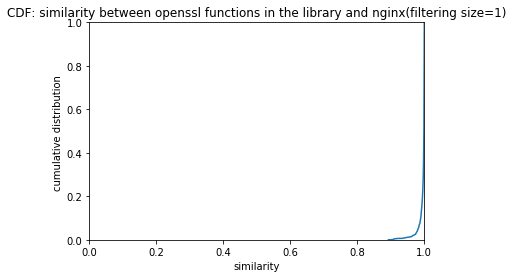

In [28]:
#analyse the functions with low precision and recall
from numpy.linalg import norm
a = emb_test[141]
b = emb_openssl[name_openssl.index(('CRYPTO_get_new_dynlockid', 'sk_find'))]
result = np.inner(a, b)/(norm(a)*norm(b))
ranks=[]
for i, ranklist in enumerate(rank_index_list):
    name = name_test[i]
    index_openssl = name_openssl.index(name)
    a = emb_test[i]
    b = emb_openssl[index_openssl]
    result = np.inner(a, b)/(norm(a)*norm(b))
    rank = ranklist.index(index_openssl)
    if rank < 10:
        ranks.append(result)
        print i, name
        print rank, result
cdf(np.array(ranks))

In [18]:
# name_test=[]
# emb_test=[]
# name_openssl=[i[1] for i in libitem.twoGramList]
# emb_openssl=[i[0] for i in libitem.twoGramList]
# for twogram in testbin.twoGramList:
#     if twogram[1] in name_openssl:
#         name_test.append(twogram[1])
#         emb_test.append(twogram[0])
import os
path_lib = '/home/yijiufly/Downloads/codesearch/data/openssl'
lib='libcrypto'
#folder = 'openssl-OpenSSL_1_0_1d'
emb_openssl = []
for folder in os.listdir(path_lib):
    dotfile = lib+'.so_bn.dot'
    dot_path = os.path.join(path_lib, folder, dotfile)
    libraryName = folder.split('-')[1] + '_' + dotfile.rsplit('.',1)[0]
    emb_path = os.path.join(path_lib, folder, lib+'.so.ida.emb')
    nam_path = os.path.join(path_lib, folder, lib+'.so.ida_newmodel_withsize.nam')
    nam_path_full = os.path.join(path_lib, folder, lib+'.so.ida.nam')
    libitem = Library(libraryName, dot_path, emb_path, nam_path,filter_size)
    libitem.buildNGram(nam_path_full)
    emb_openssl.extend([i[0] for i in libitem.twoGramList])
import random
distribution=[]
for idx, twogram in enumerate(emb_test):
    a = twogram
    #ind = name_openssl.index(twogram[1])
    ind = random.randrange(0,len(emb_openssl))
    b = emb_openssl[ind]
    from numpy.linalg import norm
    result = np.inner(a, b)/(norm(a)*norm(b))
    if not np.isnan(result):
        distribution.append(result)

fp=open('dany','w')
for item in distribution:
    fp.write('%g\n' % item)
fp.close()

graph loaded
/home/yijiufly/Downloads/codesearch/data/openssl/openssl-OpenSSL_1_0_2g/libcrypto.so_bn.dot
edges loaded
n-gram loaded
graph loaded
/home/yijiufly/Downloads/codesearch/data/openssl/openssl-OpenSSL_0_9_7j/libcrypto.so_bn.dot
edges loaded
n-gram loaded
graph loaded
/home/yijiufly/Downloads/codesearch/data/openssl/openssl-OpenSSL_1_0_0d/libcrypto.so_bn.dot
edges loaded
n-gram loaded
graph loaded
/home/yijiufly/Downloads/codesearch/data/openssl/openssl-OpenSSL_0_9_8h/libcrypto.so_bn.dot
edges loaded
n-gram loaded
graph loaded
/home/yijiufly/Downloads/codesearch/data/openssl/openssl-OpenSSL_1_0_1d/libcrypto.so_bn.dot
edges loaded
n-gram loaded
graph loaded
/home/yijiufly/Downloads/codesearch/data/openssl/openssl-OpenSSL_0_9_7i/libcrypto.so_bn.dot
edges loaded
n-gram loaded
graph loaded
/home/yijiufly/Downloads/codesearch/data/openssl/openssl-OpenSSL_0_9_8a/libcrypto.so_bn.dot
edges loaded
n-gram loaded
graph loaded
/home/yijiufly/Downloads/codesearch/data/openssl/openssl-OpenSS

edges loaded
n-gram loaded
graph loaded
/home/yijiufly/Downloads/codesearch/data/openssl/openssl-OpenSSL_0_9_8i/libcrypto.so_bn.dot
edges loaded
n-gram loaded
graph loaded
/home/yijiufly/Downloads/codesearch/data/openssl/openssl-OpenSSL_1_0_0h/libcrypto.so_bn.dot
edges loaded
n-gram loaded
graph loaded
/home/yijiufly/Downloads/codesearch/data/openssl/openssl-OpenSSL_1_0_1r/libcrypto.so_bn.dot
edges loaded
n-gram loaded
graph loaded
/home/yijiufly/Downloads/codesearch/data/openssl/openssl-OpenSSL_0_9_8g/libcrypto.so_bn.dot
edges loaded
n-gram loaded
graph loaded
/home/yijiufly/Downloads/codesearch/data/openssl/openssl-OpenSSL_1_0_1h/libcrypto.so_bn.dot
edges loaded
n-gram loaded
graph loaded
/home/yijiufly/Downloads/codesearch/data/openssl/openssl-OpenSSL_0_9_7a/libcrypto.so_bn.dot
edges loaded
n-gram loaded
graph loaded
/home/yijiufly/Downloads/codesearch/data/openssl/openssl-OpenSSL_1_0_2m/libcrypto.so_bn.dot
edges loaded
n-gram loaded
graph loaded
/home/yijiufly/Downloads/codesearch/

20

In [10]:
from redis import Redis
from lshknn import getHashMap
import pickle as p
redis_object = Redis(host='localhost', port=6379, db=0)
hashMap = getHashMap(["filted1-2gram-binary1","filted1-2gram-binary2","filted1-2gram-binary0"], redis_object, dim=128)
keys = hashMap.engine.storage.get_all_bucket_keys(hashMap.lshash[0].hash_name)
vectors=[]
print hashMap.engine.storage.load_hash_configuration("filted1-2gram-binary1")
print hashMap.engine.storage.load_hash_configuration("filted1-2gram-binary2")
print hashMap.engine.storage.load_hash_configuration("filted1-2gram-binary0")
for key in keys:
    bucket_content = hashMap.engine.storage.get_bucket(hashMap.lshash[0].hash_name, key,)
    print key
    #print bucket_content[:100]
    print len(bucket_content)

using redis
{'dim': 128, 'hash_name': 'filted1-2gram-binary1', 'projection_count': 30, 'normals': array([[ 0.82387462,  0.92061338, -1.91185673, ...,  0.20117511,
         0.58975538,  0.79827237],
       [-0.06855382,  0.50906269, -1.01363442, ...,  0.08390998,
         1.37529334, -0.71424446],
       [ 0.15717494,  1.15363819,  0.22340794, ..., -0.10054476,
         0.5601201 , -1.64256845],
       ...,
       [ 0.32560247, -0.08825454, -0.59939546, ...,  1.96075756,
        -0.64630894, -0.18424955],
       [-0.45528911, -0.24846654,  0.52686485, ...,  1.63996236,
         0.57790501, -1.16847841],
       [ 0.60931571,  1.56437071, -0.9122309 , ...,  0.08524248,
         0.43030165,  0.66585432]])}
{'dim': 128, 'hash_name': 'filted1-2gram-binary2', 'projection_count': 30, 'normals': array([[ 0.08287462, -0.35982368, -0.91333233, ...,  0.34452877,
         0.10188449, -1.19138348],
       [ 0.87700223, -1.64269814, -0.01398971, ...,  0.61630775,
         0.90521445, -1.33160823],
  

000101110000000001000100001110
1
101111000100011001110100001100
2
001111010010010001100101001101
1
011101000100000101010101001100
1
001111000100011001010101101000
9
001100010110000101110101101001
1
101111110001000001100100100101
1
110101000100001101010110010111
15
100111110000110101001000110111
1
011111010111011001111111101110
1
110111000100011001110111011100
1
110101110000000001010100001000
1
100101100000000101010101101100
1
100111100100000001010100101100
2
110101000000000100011100001110
2
110101000100000100110100011111
54
010100010011001001011100011100
4
000101000100001000010100001110
2
101101100100000001010100001101
3
110111000100000100110100001111
23
000101000100000001010110001100
3
001111010010010001010100001000
17
000111110010110001000100001000
143
011100000100000001110100111011
1
101111000110000001110101111001
2
110101000101001000011111011110
12
101110010100000100110101001010
1
001110010100000000110101001011
1
000101110100000001001101101100
1
100111010100000101000100111001
1
101

111101000100000000010101001110
4
000100010011100000000100111000
1
001111000001000101110100101100
1
100110010100011101010100101111
1
100111000110000101011101101100
1
111101010100001001110101001101
1
111110000100000101110100101111
6
100111110000100001000100100000
1
101111000110000101110101001011
1
000101010011111101001000010100
5
100110010000010101010111101111
2
101111000000010101110101101100
1
111101000100000001111111011100
3
111100000100000101110100110101
3
110101000000001001011100001110
5
000101110000100001001100110101
1
111010010100010101110101001111
3
110101000100000000110111011111
27
111111000100000001110100001011
1
110101010100000001011110011111
1
101010010000010101110101101100
2
110100000100000001110100011111
1
000111010110000000010111001110
2
111111010100010101110100111101
1
000101110000110001000100110100
1
101110000100000101110100101001
1
110111100110001001011101001001
1
001111010000000100110100001100
1
001101000100000010110100001101
1
001101010011100101010100101000
2
101111100

101111010010110101000100101000
6
100110010010110101010100011100
1
001101010010010101010100001100
1
000101010100110101000100010010
3
101111010010011001010100111100
2
101101000100000001110100011000
1
110111000100000001110111001101
1
100101010100100101011110011111
1
100110000100000111110101101111
3
001101000110001001010111011100
4
101110010110001101010100001111
2
001101010001000001111101001100
2
100101010110111001011100011100
1
110111000100000101011100001101
1
100111000100000001010111001100
3
010101000101101000001110011110
3
101100010111000001110101101101
1
001000010011000000110100101011
1
001111010000110000000000101000
3
100111010000000000010101101000
1
001111010110011101011100000100
1
000101010000000001010100011000
2
111011010100010101111110011111
6
101111100000011001010110101100
1
101101000100010101011110011001
2
011101010101000001010111011111
1
000111110000110111011000111100
1
100110000110001001110100111101
1
000111110011100101001100101100
1
001110010010110101000000101000
1
0011010101

2
000101000100011001011100011100
3
000111010000110101001000110010
1
000111010110000100000100110111
1
000101010100000101011100101101
1
001101010011000001110101001100
1
110111000100000100010101100111
1
000111000000001001011111011100
2
101101000100001101010110101101
1
110101100100001000011110011110
1
111110010010000001110101001111
3
110111000110000101011101001101
8
100101010001110101001100001010
2
110101010110001001001110011111
1
111111000100000011110101101111
5
110101000100001001010100001111
251
001111110011100101000100101100
1
000100110110011101100101000100
1
010101010100000000011101011110
2
001100010100010011000101101001
1
000111110000000001000100101000
2
100101010000000101010110011110
1
101111100000001001000100100100
3
100101010100000000000100001111
2
001101010110001001010111011100
1
101110010001000101111111001111
2
101110000100000001110111111111
2
000101010110000001000101101110
2
101111010100010101110111100101
2
010101010110010001011111011100
4
100111010010011101100000101100
1
100110

111110000100000101110101111111
54
100111000100000101010100101110
2
111111000110011101110101111111
1
110101000100000100110100001111
562
100111010000111101001100111100
3
000101110011110101001010111000
1
111111100100000000010101101111
3
110101100100001001110101001110
1
110111000100000000010101001100
7
000101010110001001010110011000
2
111111010110001101010101101111
4
111101000100000001110110101101
1
100110010110011001110101111101
1
010101000100000001110100001111
12
101100000100001001010100001001
1
000101010101001100111110011101
1
001111010000000001010101001101
3
111111010100000001010100001001
1
000101110000110101000000000000
2
110101010100000101010100001110
2
010101010010000001011111011100
1
010101000110011001001100011000
5
101101010100000101111100001111
2
101111110000010101110101000000
1
001101010100011001000110111011
1
111111010000000001010100101111
2
000101010011000001000101101000
1
101111110010010001000100100100
22
001111000100000001110101111101
2
000100010110110101000100011000
5
11111

1
101011000100010101110111100111
2
101110010100000001010101110111
3
010101000000001001011100001100
10
110101000101000100110110011111
6
000101010001001100001100011110
4
111101010110010001010110111000
1
110101010100000001010111001110
2
100101010100000100010100101000
1
110101000101001001001110011111
6
000110000100001001011100100001
1
100111100100011001000100101100
1
101111010000010001110100101111
4
100111010000010001010101001010
1
001101010000000001111101001100
2
100111010110011101001100101100
1
000100010010000001010101101000
2
111110010000000101010100001111
2
000101110100001001011110011110
1
101111000100010001000100111101
1
100111100100011101010101100100
1
100111010000000011001011101011
1
101101010000010001110110101111
3
111111000100011001111111111101
2
100111010000110001000101010000
1
011111010000001001000110011100
1
101010010100000101110101001001
1
111010010100000100010100001111
7
100111000100010101110100111101
1
110101110100000001010101011110
2
001111110010100101000100001000
1
0011010

2
110111000110000001010101001110
3
100101000100000001010101001111
2
100111010110000001110101001000
2
100111000100001101110100101101
3
011111010010000101100110111101
1
000101000100001101010101101110
2
010111000110011101011100011100
3
111101000100001001010111001100
5
001101010010100101011110101000
2
101101010100000000010101101110
3
100101100100100101011110010011
1
100110010000110101010100101000
1
111101010100000100010100011111
2
101111010110000001000101000000
1
000110010010100101000100000000
1
100111000110001001110101011101
2
000101110000110101001100111100
2
100101010100100101000100001000
1
100101000100000101011110001111
2
101101010011101001000100001001
2
011101000100001001010100001001
3
111101000100011001010111001100
1
011101010010011001011100001100
2
101111010010011101011101001110
2
111101010110000100110101001111
1
000100110000000101000100101000
2
011110010010010101110101001100
2
110101000100001001010110011110
8
001110010010010001110101001100
3
101111110000001001011100101100
2
11111101

100111010010010001000100001000
14
000101010010100100001100001000
1
101101010100000101010100101101
2
100101010110000001011111001110
3
001111010010010001110111101100
3
010101010010001100001100001100
1
001111010011100100000100101000
2
100101000100001100011110011110
1
111111000110001001010111011110
4
000101010000000101011110001100
3
101100010100000101110100101101
3
110111110011100000000101001100
1
101010000100010001110101101111
1
110111000000001001000100000101
1
100111010000000101010100101100
4
000111010011100001000101001000
1
100100000100000101111100001111
2
100111000100010100010101001100
2
101110010100000101010111101011
2
010101010100000101010100001100
4
100111110001110001000000001010
2
111010000100000000110101100011
1
000101010110001001011110011110
1
101111110000011001000111100100
8
111101100000000001011101001110
1
001101010010011001010100101000
1
100101110000110101001100111011
2
110111000010001001011101001100
1
101111010001110001001000010000
1
100101000100000101011110011111
4
000111110

010101010000000001010100011000
1
100101110001100001000011100000
1
001111010101001101010100001000
2
001101010100011110111100101111
1
001111010000010101110101001101
3
010111010000000100010101001100
2
001110000110000100110101100001
4
111111010100000000110101001111
61
100111010001100001000011100111
1
010111000010101001001110001100
4
101111010010000101000101001000
6
111001000100000101110101001111
1
100111010000000011010111101101
1
101111000010010101110100100101
2
101111010110011111011110111001
1
110111000100001001010100101111
4
000101010010000000011100111100
1
110101000100000001010101001011
3
000101110010110001000100001000
106
001101010100000100010100111000
1
000101110000100001000101101000
1
111101000100000000010110101111
1
000101110000110011001010110010
2
100101010100000101011100110111
1
101011010000010101110101101001
2
101111010010000001110111011110
1
001101000100001001010101011000
1
100101010100000001010100000001
1
101101010000101001000100101101
2
110101010101001000111110011111
1
1011100

010111000110001000011101001100
1
101010010000010000010100101000
1
101111110000011001000110100100
39
100111110000110001000101001000
3
000101010010100101000100001000
1
000111010000110101000100101100
2
110111000100001101010111001111
2
111110000100000001110101001011
1
111110010000001101011101001111
1
010101000100011001011110011100
8
010101000101001001011100011100
3
000101010001100101011110011100
1
100111000100000001110111001110
2
001111000100001101010100111011
1
011111010000101001000100101000
2
101111000010011001011100101100
2
000101110000110001000010000000
6
010101000100001011010100111000
1
110111010100000001010111111111
2
101111010010000001110101101000
1
100111010100000100110100001110
5
110101000100000001011101011110
8
111101000100000001010110001101
2
100101010100010001011111001100
1
001101010100001001010101111100
1
100011000100011011010100001000
1
100111010000010101001100011000
1
111111010100000001010100111111
7
110101000010001000011100001110
1
011101000000011001110101101000
1
000101010

000101110001110101011110110100
2
100111000100010001011101101100
1
001110010100001101110100101101
24
001101100100000101010100101001
2
101110010010010011010100101001
1
100111000110011001011111111100
1
000101010011000100001100001100
3
001101010010010001011111111100
1
011101010100001101010100001100
3
000101010001100101001100110010
2
001111010110000100110101001110
4
100111010000000001110100011000
1
010111000010011001011110011101
4
001111010100010001010100011110
1
010101000100001100011100011101
1
100111010000001001000100101100
2
110101010100001001010101001110
2
101111110010010001100100100101
4
110101000110000101110101011100
1
100101110100110101000110110101
1
110101010110010001010101001111
2
111011000100000000010100101011
8
000101110100000001010101001100
1
111111000000010101010100011100
1
010101000010001001011100011100
98
001101110001100001010100000000
2
100111110000010001000100100100
1
010101000111001000011110011110
6
110101000110000100111101001110
3
100110010000111101001100111100
10
1001010

001101010010010001110100101000
1
000101110010110001001000111000
1
111111000110001101111100001111
6
100111010100100001100111010001
1
101100010100010011000101101001
9
000101010000110001000100011000
9
010101000110001101001110011101
1
101010010001000101111111101111
3
011101000100001100010100001100
1
101110010000000001010100101001
1
101110010000010101110100110111
2
001101110010110101001100101000
4
010101010110011000010101001110
1
101110000110000001110101101011
3
001111110010110000001100100000
3
000110010000010101110101001100
6
011111000100000001111111011110
6
111101000110000101110101001111
2
000101010000100101001100010100
6
000101110000100101000000001000
2
100101000100000001110101001110
1
000101010001100000000101001000
1
000101010100000001001110111110
3
111111000100001001010110111101
1
000111010010110101001000111100
2
000101110000000001010100101100
1
000101010100011001011111111100
2
000110110000110001000100001000
7
010101010100000001111110011111
1
100111110000001101010101001100
2
1111010001

4
011111010110010101110111010111
7
101010000100000010110101101001
1
101110010100011101110100110111
2
000101010101001101001100110001
1
100111010110001001010100111001
3
100101010100000001010111011100
1
001111010011000001000101101100
16
101111010000000001110100101101
4
100111000100010011010100110101
1
110101010100000100010100011111
7
111111000100000101111110011111
2
010101000000001101011110011100
1
011101000100001001010111111100
6
101111110010010001110100101100
2
000101010000110101000100011000
13
001101010010011001111100101100
1
110101000100000001010100001110
49
100111010001010101100100110100
1
101001000100000010010100001000
3
000101010000100001000000110100
1
010101010110001100111111001110
4
111011010000000001110100001011
1
100111110000111001000100111110
1
001101010111100001001100010100
1
010111000110001001010101111100
1
101111000110000001110101111111
1
100111110000011001000100100100
8
001111010010011001110111111100
1
111111000100001001010101101100
1
000101010011100101001110110000
1
10011

000101000000001001011110111100
1
101110010000010101110101111001
24
101110010110010001111101010110
1
001101010100000001011111011100
1
110101010100000000010101001110
1
111111000100000100111111001111
1
100101010110100001011111011110
3
101100110100010101010100001000
1
000001010100010111010100101000
1
110111010110011101011101001110
1
111110000110001101010100101101
2
000111110010110101001010100000
1
101110010100000001010101101110
3
001111010000000101010101111000
5
000111100011001101001100111100
1
100101110000110101001000110111
2
110110110010000001000101001100
10
110101000100000000011110001111
26
000111010110001101110111001100
1
101010110100000100010100101111
1
000101010001110111001010110110
2
100001000100000000010100001011
1
000101000110110101010100011100
1
111111010101000001110101001011
2
101110010010110001000001101001
1
001111010010110000000001101000
1
001111010110011001000100001100
19
100101000100001101111110011101
6
100101000110000101011100011100
2
101010000100000101110100101101
2
001111

101101000100001001010100101100
10
110101010100000000010110000111
1
101110110010110101001100101000
2
100101010001110101010000011000
1
101110010010010001100101100000
1
101111000100000001110111011010
10
000111010000101101000100101100
1
110101000101000100011100011111
3
000101000100000000010100001100
2
100101010000000001010110111100
1
100101000101000001010100101111
1
101101010100000001010110001100
1
111111110010110101000101001000
1
010101110001001001011110111110
2
101101010100000001010101011100
1
110111010110001001010111001100
3
101111010100011001110100100111
2
101111000110000101110101101111
1
101111110010011001100100100100
1
000101010000000001011110011100
1
110101000110001101010111011100
2
001110010010110001010101001000
1
010111010100000101110101001000
1
111011000100000001110101101111
2
101111000100000001110111101001
10
100111010000000001010110111000
1
000111010000010101000100111100
1
000110010010111101001100111100
2
010101000100001001110100101111
2
000101010100001001001000110110
1
0001111

100011100100000001110101001111
1
100101010100100101011100001000
3
101111010100011001110100100100
2
110111000100001000110110011111
1
100101010001000101101110100101
1
111111010110011001010100111100
2
110111000111000001011111001111
1
010111010011100101010101001000
1
001100110010100000000100100000
3
100111010100011101110111000111
2
100101110000110001001101011000
1
010101000101001000011100001110
2
100101110001110001001011101000
1
100101100100000101001110110111
1
001101010000000001010100001110
2
000110010100011100111110011111
1
100101000100000001010100101100
2
111100000100000101110100111001
2
110110000100000110010101100111
1
010111000110000001010101011110
4
110101000101001100111100001111
17
100110010100000101010100001101
1
101110010000000101100101000111
1
101010010001000101111100101111
1
101111110000000101010101101000
34
101110010000011001110101101111
3
111111000100000101010101001001
3
101101010100000001110100001110
1
000101110000110101000100110000
5
110111010110010000010101001111
1
11111100

000000010100011010011100101000
1
110111000110000001010101011111
1
100110010100000101000100101101
2
001110010000000001110101001000
15
001111010000010001010100111111
3
101111010000000001110101101110
4
110101000100001000011110011100
2
100101110000100101010101000000
1
101111010000110001000100110000
3
110101100100000001011100111101
2
100101010100001101010100101000
1
100101010000000001011100001110
1
011111110110000001010100101000
1
001111010000011001010100001000
2
110111000100000001010110001000
1
110111000100000001111111001111
1
110101000100000100011100000111
1
010101010001101001011110001101
1
100100000100000011110111101001
1
101111010100011001110100101110
3
100101000100001000010100101100
32
110101010110001100110101001110
1
011101000001001001011100101000
2
101111010000010001000100110011
1
110101010100001001011110011111
3
111111000100001000010100011111
1
100111110000011001010101101100
1
010101000111001100001100011100
1
101111000100000100110100111111
1
001111010100000001110101111010
1
00111101

101101010000000001010101001101
3
001111110000000101011100101110
2
101111010100010001110100101001
1
101111010110011001010100111100
1
001101010100000001010101001000
9
001111010010010101000100000000
1
001111110000110001000100001000
5
001011010011110101100100101000
1
100101100000000101010101101000
2
101110010000000101100100101111
1
101110010100001011010101101100
13
001111010011110001010100001000
1
100101000100001100010101001110
5
101110010100000101110100001011
3
101111000000010001111111111001
3
100101000110001101011110011111
3
100110010100001001010100001100
1
010101010110001001011110011100
11
011101010100000001110111101101
1
111101000101001001011100001100
1
000111010000010101010101011110
2
101111000100000001110100101101
1
101111010100001101111110101111
2
110101010101000100111110001111
5
010111010010011001000100010000
1
001110010110011101010100111100
2
000111010100100101000100001110
1
111111000100000101110101101101
2
100111000100000101110101101110
1
101100000010000101111101111101
1
00011111

7
100111010000000001000100011011
1
101111010001000001100101001000
2
111111100100000101110100101111
2
000111110010000101000100101100
2
111110010011000001100101001000
1
010101010110011001010100011000
1
101101010110000001001111101100
1
001100010100000101010100001110
3
101111010100000001110101001011
2
101011010100000101110101101101
1
100100000100000111110101100111
2
101111000110001000110101101110
1
100110000100000101100100101111
4
111100000100001001010100111111
9
100101010110010001000110011101
1
110101000100000001010101011011
1
000111000010011001010110111100
2
001101010000000001010101101001
5
110111000110000001111110011111
4
111110000100000101110101001111
9
101111010010010001000101000100
1
100101010001110001101010100101
4
110101000100001001011100001000
5
101111000100000101110101101111
26
101111010100001001000100100110
1
110111010100001100110111001111
31
100110000100010001010101101101
1
010111000110001001001111011100
1
101011000100000101110101001011
2
001101010100000101010100101100
1
000111

000111010010111101001100011100
11
001111110000110101001101101100
1
101100010110001001010101001000
1
011111010110011001010100111100
3
100111100000000001010111101100
2
010101010011111000001100001110
1
100111010000000001010101101101
1
001111010010010001010111001100
3
000111010000010101011100101100
1
001101000100001001010110111100
2
110101000101000000011110001111
6
100101010000000101010101111111
5
100111100100000001000111101101
1
101000010100000101110100101111
1
111101100010001001010100001110
1
101110000000001001110101111001
2
000101010000100011000010110011
4
101111010000000001010101011011
1
000110110010110101000100001000
10
101101110000100101001111101000
13
111111010110010001111101001100
2
100110010000110101001100011000
1
001110000000010111110100101000
1
101111010011000001010101101000
1
101111000110000001110101001000
1
101111110110011001000110001101
1
101110010110010101010101111011
1
100111110001100101001000111110
1
101111010000100001000110100010
4
111110000100000001110100001011
3
0001010

100110010001110001000100001101
1
100101000100000100010100000110
2
110111000100000001011110011101
1
000101110000100001000100011000
5
000100010000110001000100011000
3
110101010100001000011110011110
1
110101000100001000010100001100
4
100111010000000011010101101101
2
111110000110001001010111111111
1
101100010100000000110100101111
40
100101010000100101010100001000
1
111101000100000100010101001111
2
000111010000110101100000100100
1
100111010000011100001100111110
1
011111000100001001010100101110
1
110101010100000101011100001110
1
001110010010110000010101001000
2
100111000100001001110111011110
4
101111010000000001100100100101
4
000111010000010101011111011100
1
111111000110011001011101101101
1
110110000100001001010100100111
1
100111010001000001100111001111
1
100111010000011101001100011100
1
100101010100000000110111011110
2
100111110000110101001000100111
2
101111010000010101000100000000
1
010101000100001001010101001111
2
101111010000000001110101101111
2
100101000110001001011100111101
1
100111010

100101010000000101010100111110
1
101111010000100001011100110000
1
000110010000110001000010010000
1
110101010000000101010100001111
4
111100000100000010110100001111
12
110101110100000101000100011000
2
111111000110000101110111001111
1
000111000010011001001100101100
2
111101010110010001010110111001
1
101101010100000001110111001111
21
101101000100000100010101001111
14
011101000100010001111111111111
2
010101000100001001010110011100
5
001110010000010001010100011000
5
100111000000011101000100101100
2
100111100100001101010100101100
2
000111110000110101001000100110
6
101000010100000111110100111011
2
111111000110001001010101001110
325
111101000100000101010101101111
2
111111000110001101010101111110
2
000101110001100001001010110010
3
000101110011100101001000110010
2
001101010110010101011111101101
2
000101010000000101010100101100
2
111101010100010001110100101001
1
001111010000000011110101101001
1
000111010000010100110101011100
1
000101010001110101000000010000
4
101111010011010101100101101000
3
10010

101110010100001000110101101110
2
110101110010001001010100001100
1
011101000100000001110110111011
1
100111110001100001000001100010
1
111111100100000001110111111011
1
111100000010001101010100001101
2
110101000100001101001110011111
3
111101000100000001110110111001
1
100110010000000100010101010011
1
100111110000110101000100110000
2
000100010000100001001100111100
1
101111010000000001000100101111
1
000101110000100101000111111000
1
111100000100000100110100001111
8
111011000100000001110110011111
2
100111000100000111010101101000
3
000111010000110101000001110110
1
110101000110001100010100001100
2
110101010100000000110100001110
2
101111000100001001010101101010
1
101101000100001001111100011100
4
101111010010010000110101101100
3
010101010110010000001100111101
1
000111010000100000000111010010
1
000101010000100001010101011100
1
000101110010111101001110110000
1
000101110100000101001111111110
1
100101000000000001110110101101
1
111111010100010101110100010111
1
101110010000000001110100001011
2
0111110100

101111010100000001111111011101
1
100101010100000100111111001110
4
001111000100001001010101111110
5
000101010100000101010100110111
1
101111100000110011001010110010
1
010111010010110101010100001000
3
111010010100000011110101101111
1
111100010101001000010100101111
5
101111000100001101110100011110
1
101110000100000001010111101001
1
110101000100001101010110011100
3
111111010010000001010101101000
2
101111010100000001010100101001
4
001101000110001001111101011100
1
111111010110001001011111011111
11
000101010000100001001110001100
2
101100010100000101010100001000
8
101011000100000100110101101011
3
101110010110010101110100110111
2
100111010000000101010101000000
1
010101010111000100001100011100
1
000110010010010101010101001100
1
101111010110011101000100001100
3
000111010000110001000100011000
17
010101000100001101011100001100
23
101111100100011001011100101100
1
101110010000010001110111001111
2
001101010110001001010110111110
1
100101000100000001010100111111
2
000101010001100101000100010110
2
0001010

1
110111100100000001011111011011
2
001111010000010101110101000100
1
011111000010011001010101111000
40
111111010011000101100101100101
6
101101010100000101010100001010
1
110101010100000001011100001110
1
001111010110000001110101100101
1
101111100000010001010100101100
1
001101010101000001110100101101
2
000101010000110101000101111010
2
100111010100011001000100111100
3
101111010100010001110101111100
3
110110000100001101011110011111
7
001111010010010101110101001100
6
101111010100010100110100001111
1
101011010100000101110111101111
1
000101010000000101001110111001
1
101110010100000000110101101000
4
100111010010001101000101101100
2
100111010000100001010100001000
1
100111010100000100110101001100
2
000111000100011101011101101000
1
000101010000010001000100001000
7
111111010110011001011110011110
1
000101010001100101010100101000
1
111100000100000001111110011111
1
111110010010000001111110101111
1
101101010100011001011100010001
1
100111010000010101100100101100
4
001111010000010001010101101100
8
1011010

011111000100011001111110011111
1
000111000010001001011110111110
1
010101000110001001011110001110
6
111111010000000001010111111111
2
101100110000100111001011101001
1
101100010100000101110100001000
4
110101010110001001010111011110
4
100101110100100001000101001010
2
001111010100000101110101001101
3
000111010001100100000001110011
1
101111000100000000110101001110
16
100101010110000001010100101000
2
101111110010110101000101001000
2
110111000110011001111110111100
1
100111010000110101000111011010
2
101110010010000101100101001100
1
001111110100010011010111101011
1
000101010000001001010100101110
1
001111010000110001010100000110
1
001111010011000001100101001000
4
111010000100000100110101101111
1
010101000100010101010100111100
8
111111010010000001100101001000
1
111101100100001001111111001100
1
001110010011000001100100111101
1
110101100101001000110101001111
1
010111000110000001010101011100
2
101011000100000100010100101001
1
100111010100000001110101101001
2
000101010000100101000100011100
5
110101000

110101000100000101010100001111
1314
100111000100001001010101101110
1
011101000100000001110110011111
5
110101010101001100011100001110
2
110101000101000101111111001111
1
100111010000100001000101001000
1
111100000100000001110101101111
1
110111000110001101010110011101
1
000101010100000001010111010111
3
101111110000000001000100101000
2
101000110001100101011110110011
1
100101000110001001010101001100
3
110111000110000001010101001001
1
101101010000000101110101001100
1
101111010000000100010101001111
6
110101100100000001010101011111
7
100101010100000101010110001111
1
111101000100001101110100101101
2
110101010100000001010101001010
1
000101110001101101010100111000
9
100111000100000000010101001110
2
110101000110000000011100011111
3
001101000100001001110101001000
1
001111010100010101101101101000
1
011011000000011110011100000000
1
101010000100000010110101001111
2
110111000100001001011111001100
1
100110010000000001010101001110
2
101111000100000000110101101001
19
101010000100000100110100100111
1
101111

110101000100000001111100001111
1
100101010100000100010100011111
4
111000000100000101010100101001
1
101111000100000011110101101101
1
110101000101000100010110000111
36
100110010100001001110100011111
1
100111010100000001010111001010
1
101110010010000001000100111000
1
001100110100010111000101101000
1
110111010100000001011110011111
3
100101010100000001010101001101
2
110111000100000111110101101001
3
000101110010110001000110101000
1
000101110001110000011101101100
3
101111110100001101011100101100
2
011111010000001001010100111111
3
111111010110000001010101101111
6
110101000110001100110100011111
28
111111010000001001010100011111
1
001111000100000100010101101110
1
111101000110001000110111001111
3
110111000100000001110111101111
1
000111110101000101010100110111
1
100111110110010001000101111000
2
100101010100001001010111101100
1
000111110001111001000100111000
1
111111010110001100010101101100
1
001111000100010001110100111100
1
110101010010100001011110011100
1
101111010100000001010111001100
3
10111101

101100010100000101010100101101
1
000100110001110010011001000100
1
101101000100000001110101001111
55
001101010000010001100101101000
2
111101000110001001011101011101
1
001111010000110101010100001100
4
100111010001001101111111001100
1
001111010010110000000100111000
1
110101000110000001111100011101
1
100101010101000001111111011111
2
000111010000110101000100010100
1
100101010100000101010110110111
2
101111010010011001011110111110
2
010101010100010100010100001100
1
011101000100001001110110111001
1
100111000100010101110101111011
3
110101110100001001010101001110
1
011110010000110001010100001000
1
101010000100000000110101101000
2
100111000100000100110100011011
1
101111010110000001000101101000
1
110101000110001001010110011100
2
110111010110001000010101001101
2
111111010010000001110101101101
1
101110010010000101010110101001
1
000101010001100101000101001000
2
100101000100001000110101001111
1
011111000010010001010101111111
2
111101010100000001010101001111
3
000101010000100101011000111100
1
101111000

001110000100011100110101100110
1
000101010000110001001101011010
1
000101110000110101001100010000
3
100111110001110101100000111100
1
001101010000000001110110001100
1
001110010100001100110100101110
1
110100010100001101111100001111
3
001110010011111101111100011110
3
101111000100001001011101001110
1
011101100100000001010100001001
3
100111000100001000110100001101
1
101110000100000100110101101001
1
100101000000000001011100101000
1
000101010100100101111111010111
1
100111000100010001010100111101
1
111110010110000101110101101111
80
001111010000110001000100000000
2
110101000100010100100110001111
1
110101000100000101110110101101
2
000111000100001001110110101101
2
001101010000001001010111011100
6
000111000010001001011101011100
1
111100000100000101111100001111
3
010101000101001000011110110100
1
001101010010101101000100101011
1
111111000110001001110101111110
3
100111110000010101010100101110
3
000111110000110101000100101000
7
001111000100001001010110011100
2
111111100110001001010101101110
1
010101010

100101010100000001010100001011
63
000111010000000011010101101101
1
110101000100000001010100011111
409
101111010010011101010100100100
1
100111010011000001000001101100
2
100110000000001000010111101111
1
101110010001010101110101101111
1
101111010011010101110101101100
3
010101000110000001011111011111
1
110101000100000100011110001011
4
100111000100001000010100111111
1
100101010000000001000100101001
5
001101010010100001001110110010
1
101000000100000101010100101001
1
101100010001000001010111101101
1
101101110100000001010101001000
1
010101000101000001110100001100
1
100101110000100101011110011010
2
001111010110000101010101101100
4
010111010110001001011111111100
15
011101000100001101010100101101
1
011101000100000001010100111001
2
010101010110001001010111001110
2
110111010100001001011110011111
1
001110000100001101110101101110
4
100101110100001001010100101110
1
100111000110001001010101001000
1
101101110010100101001111101000
10
100110010000100001000100001000
1
111110010110001101110101001110
1
01011

110111000100011101010101011101
1
000111010000000001010100001011
1
100101110010110001001101101000
2
000101110011110001001000110000
1
101111110110011001000100101100
1
100101010001110101000000010000
1
110101000100000001010111001011
1
000101110001110111000000110000
3
111110000010010001110101101101
2
110101000100001101010100111111
2
101111010100010101110111101111
7
110101000100000001010101001101
8
100111010100000001010101001110
5
110101000010001101011100011110
3
000111000100001010010100101100
1
000101000110011001111111011100
2
101111000100110101101111100111
1
011101010100000000110100101111
2
100111010100000000110100001100
1
110110010100001101010100110111
1
101101010000000001010100001111
2
101111010100000010110111001111
15
001100010010100001000101101000
1
000101010011100101000100011000
1
101110110010110100001100101000
1
001111010000010001110101001000
2
111010000100000001110101100001
2
001101110010000001000100000000
2
101110010110011101110101001110
8
001111110000000001010101101000
3
111111000

2
000101010000100001000100011010
8
101101000000000101010111000111
1
111111010101000100110101011111
32
011110010000000101110110001111
25
100111010100010001111111000111
1
100101110100110101000100010001
1
001111000011001001011100001000
3
101110010110011001110100111111
1
101110010010000101010101101000
18
000101010010000001000100101100
1
111101000110000001010111011100
1
101101010000110001001111000000
3
110101000101000001010101001111
8
101110000000010001010100101000
2
110101000100001101110100011110
6
101110010110001001110101111101
1
111101000110001000010101001110
1
101111010010010001011100111100
1
000101010110000001000101101000
1
111111000100001001010101101110
6
001101010000001001010101101100
1
100111010000000000011101111111
2
010101010011001100011110011111
2
101111000100000101010100111000
1
101010000100010101110101101111
1
001100010000000001000100101000
2
001101000100000101010110111001
1
001111010000000001110100100000
1
101110010000010101110100001111
3
100111010100011001110100001111
1
10110

000101010000000101010100001111
1
101111000110010101111100011100
2
111111000110001100110100001111
1
001111110010000101100101000100
1
101100010100001101010100001111
1
110111010110001101000100001100
2
110111000110001001111111001110
7
001111010110010101110100101111
1
011101000100010001110111011100
1
111101000110011001000110001100
11
000111110110011101011110011100
1
111101000100001100010101001111
4
100101000100000000010101001111
1
101101100100000001010111001001
1
101111010100000001110101111100
1
001111010010110101000100101000
28
100111010000000001000110111001
2
101111110000111001000100100110
4
101111010100001001010101101010
1
111101010100000101110111011111
1
011101000110001001010110011100
12
011101000010010001011101011000
1
001100010010100101001101101100
1
101110010110010101110101101000
2
001101010100000001010111111100
1
100111000100001001010100001111
4
100101010000100101000100010111
2
111111010100000101010101001101
4
100111110000111001001100100100
5
111111000100011001110110111101
1
1011100

110111000100010101110101011111
1
001111010010000001001101110100
1
001111010010000001010100101100
1
101001010110000000110100101001
1
101101110101000001011111101111
1
110101000100001100010100010111
1
101111010000010001010101100101
1
101111010100000001010100111101
1
101111010110011001010101011110
2
001111100010001001011111001100
2
101111110000110101001100100101
2
101111010010010101110101001101
3
100101000100001101010100001100
1
001101010100000001000101101000
1
000101000100000001011111111110
1
101111010100011001110101001100
1
001111010001001001100101101000
2
001110000100010100110101100101
1
110101000100000100011100000110
1
000101010000001101011100001100
8
011111000001001101010100011100
1
110101000100000101010110001111
14
101100010100010101110110011111
1
001111000100000110110101101111
1
110101000100001000000110011111
1
111111000100000001011100111101
1
001111110010110001001100010000
8
001110010000000101110101001000
1
111111000100000001110101011001
6
111011000100000101110100101011
3
111111000

111111110100000001010101001000
2
111111010110000001010101001100
13
100111010110010001010101001100
2
101110000100000111110101101111
1
111101010110000001010100001100
2
001100010010000001010101101000
6
110101000101001101011100001100
3
110101000100001001110100001111
1
000101110010100101000100101000
1
000101110000111101001011101010
1
100101010100001000011100011011
1
101110010000010001000100100001
1
001100010010010001010100001000
1
001100000100001101110100101111
1
000101110011110101001100001000
2
000101010000100000000001110011
1
000111010000010001110111011100
2
101111010000000101111111001111
6
001110000100001001010100101111
2
100111010000000001100100111100
1
000101010100000001010111111011
1
101111010000010001000100001000
24
101111010100011001010100101101
2
011111010110010101010101101100
2
110101000100001001010101001110
36
001111010100010100110100001100
3
100111010000000001010100001100
6
101101000100000011110111101101
3
110101000100001100011100001101
2
011101010100000100110101001110
2
0011011

2
101011100100010101110111000000
1
000101110000100001011110110000
1
100110000000010100110101100110
2
100101110000100001001010000010
1
000111110000110110001000110000
10
010111000101001100011110001110
1
101111010000010001010100011100
1
101111010100001001010101001111
7
000111010000011101011100111000
3
101101010100000100110100101010
1
010101000010001001011100011000
2
000111110000110101001010110011
1
110111000110000101111100011101
1
111101010100000000010100001001
3
111111010000000101110100101101
1
111111000100000001110101111001
1
101011010100000100010101001111
8
010101010110000001110101011110
3
000101110100010101000100011000
3
110101100100001000011100001111
7
110110010000010001111100011111
1
101111010000100001011100110100
1
000101010011100101001110110111
3
000111010100011011011110100000
1
000101110000110101000000100000
8
001110000000000100010101101000
1
000101010001000001011100011100
2
001110010100011101110100101111
1
001111010000010101010100001000
5
101011010001000000110101001011
1
0111010

101111010100010101110110101111
1
001111010110010101011111101000
1
001111010000000001010100101000
1
001100010010100001000100111000
1
101110010110001001110100111111
1
000101110000110101001110110110
3
101101010000100101010100111011
1
101111110000000001100100101100
1
001111010100001100010100001100
2
110101010100000100010101001100
2
001111010000001001011110111110
1
100111010010010001000100001101
1
101111100001011101011100101100
2
101111010000000111100100101001
2
101111010110011100111101001110
2
101101110010110001000111001001
1
101111000110011001111111101000
1
110101000110011001011110011101
1
111101000100001001110110001111
5
111111000101000101110100011111
1
000101000100001010010100101000
1
111110010110000001110111011111
3
011111010000011001010100001000
2
001101010100011101010111010100
1
101110000000001001010101101111
4
111111000100000001010100101111
22
101111100001011101010100001100
1
101010010100000101010100101101
2
011111010010011101000100001000
2
101110010100011101010100011111
3
001101110

111111010110000001110101111111
29
101110010100000011010101101100
3
001111110001110001000100101100
1
110111000100000101001110011111
2
101111000110011001010101111100
5
111111000100000101010100001001
1
001111010000010101111111111110
1
001110000100010101110101100101
1
111100010010010001110111100001
3
101110010000010011110101101111
1
100101010100010001110110001111
9
011101000010011001011111011100
1
000101000110011001011111001100
1
001110010000011011100101101100
1
101110000100000010110100101001
3
101110010000100001000101101000
1
101111110010100001000100100101
3
110101010100001100110111001110
1
101111010110000001010100001100
1
000101010100011001010110001100
2
101111010010011001111110110101
2
000101110001100001011001101100
1
000101010001100101001000110000
2
111101000100001001110110001101
1
000111110000000101000100100110
4
110101110010000001010100001110
2
100101010100000001010100101101
5
111101010011110001000100001000
1
101100010100000101010110011011
1
110101000011001001011110001111
1
100111110

101111110000110101010100101000
2
110111000100000000110100001011
5
000101110100101001001110010110
1
100111000110000100110101101011
1
110100000100001100010100001101
3
011101000110001001111111011110
1
000101010100000001011100011100
2
100111010011100001000001101011
1
100111010110011001111111011100
1
110111000110011001011100011101
3
100111110001100001000001101010
1
100101110000010001011111001100
1
001111010100000001110111101110
1
001101010100001100010100001111
1
001101010010000001010100101100
4
111111010100000001010100001111
14
001101010100000001011111101100
1
100111010000010100010101101000
1
111101100100001101010111001100
1
101110010100000001110100001011
3
000101010000000001010111011110
1
001101000100001101110100001100
1
101111010110101101000101100101
1
110111010100011001000100011000
1
110111010000000000010101010111
1
111110010000000001111100101111
1
110101100100000001010111001110
2
111101000000000001010100001000
3
001110010100001000010100101110
3
000111010000010001100001001101
3
111111110

001100000101101011010101001101
2
101010010000010101110101101001
1
110111000100000000110101111011
14
111101000100000001010111001100
12
001111000100000001110111111111
1
101111000100001001010101101000
2
110101010100101101000110011100
1
110101000000000101011101011111
1
101111010000000001010101000111
3
110111000100000001000100000101
1
110101000110001101111100011101
3
101111010100000101010100111101
1
101110010010010101110101001100
6
000101000100001001011111111100
1
000111000100001001010100101100
2
101111010100000101010100001101
6
000101010000100101011100111100
10
101111000100001101110101100110
1
101111010100010001010101011100
1
100111010010011101011100101100
1
111101000100001001110111001110
5
000111110001000101100110100110
1
100111010000110001010111011011
1
110101000101001000110100001111
7
001111010011010001000100101100
1
100111000000000001011101001100
1
111111000100000111010111101001
1
010111000011011101011110011100
1
110111000100001001010100111111
19
001101000010001001011101011100
1
000101

111101000100001001010100001111
42
000101110000110101001110100100
2
111111000100000001010110011111
1
111111100110001001010100001100
1
110101010100101001001100011111
4
100110110000010101000100001100
4
110111100110011001011100011100
1
101110010100010111110101001100
5
101001010100000001110110000111
1
010101000110001001011100011101
3
010101010100000001010110011100
1
110111010000100001001100010110
2
000111010000010100000100001100
4
110111000100000000010100011011
1
110101000101000000111101001111
27
100111110000000101010101000100
1
000101110000100101000100010100
3
101111010111111001001101100000
4
001101010000010001110101101000
2
100111110010110001000100100101
1
101111110010010001100100101101
1
000111110000001101000100101100
1
110111100110001001010101011110
5
000101010010110000000100111000
1
000101010010100101000101100000
1
101110010100010101110100101111
9
110111010111001001010100001101
1
011111000001011101100101001000
1
111111010110010100110111110111
1
000101110000010001000100001100
2
11110101

000111110010100001000101001100
1
000111110000110101001100101100
1
111101010100000000110100101111
3
001111110000110110000100100001
1
111111000110000001110101111111
5
000111110000110001000100011000
2
101111010100001001110111011101
4
101100010100000001010100001110
1
101010010100010000110100001101
1
001101010000000001110111111100
2
001101010000011101010100001100
2
010101010110001001111111001100
2
001111010100000000110101101111
1
000101110001100001010100010000
2
100101010000100101011100001110
2
101111010100000001110111100101
2
110111010100010101010100001001
1
011101000110001001010101011100
5
001101000110001100011101101100
1
000101010000000101010111111000
2
001111000010011001010101111000
2
111111010110011101110100111101
1
101101010110000000110101100111
1
111111110110001101011111101110
2
000111010110110101000100011110
2
001101110010100101000100101000
4
000111010000110101010101001000
1
100111010000110101100100111100
1
101110010100010101110101101111
76
110101100001001001011110011110
1
001110010

111101000100000011110101001111
84
100111010100011001000110101111
1
101101000100000010110100001101
1
101111010010011101110100101101
2
111111000010001001010100001100
2
101111110010000001110100100100
1
101111010010000001000101001000
10
001101010010111101001101101000
2
001111010011100100000100100000
9
011111010010000101010100101000
1
100111010000000101000111101100
10
101111000100001101110110001101
1
101111010100000001010100101100
5
000101000100011001011110110100
1
010111000010101001001100001100
38
111111000110011001010100111100
2
110111000110000001010101001100
4
101111010110001001010100101000
1
001111000110011001011111111100
2
100101010001100101001100001111
1
111111000110000001010101001100
3
001101010001000101010110100000
1
101110000100000110110101101011
1
101111010000000001100111101110
3
101111010100010001010101000101
6
100111010110010001111101010111
1
100101000110001101111110011101
2
100110000100010101010100111101
2
110101000100001001011100111001
2
101110010000000001110101000000
3
000111

In [11]:
keys = hashMap.engine.storage.get_all_bucket_keys(hashMap.lshash[2].hash_name)
bucket_distribution =[]
for key in keys:
    bucket_content = hashMap.engine.storage.get_bucket(hashMap.lshash[2].hash_name, key,)
    #print key
    #print bucket_content
    bucket_distribution.append(len(bucket_content))

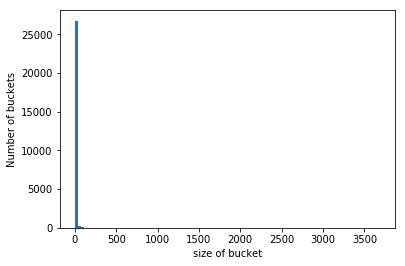

In [12]:
import matplotlib.pyplot as plt
plt.hist(bucket_distribution, bins=100)
plt.ylabel('Number of buckets')
plt.xlabel('size of bucket')
plt.show()

In [11]:
print sum(bucket_distribution)/len(bucket_distribution)

3


In [10]:
a=[1,2]
print a[1:]

[2]


In [17]:
a=[['a',(1,2)]]
b=['libcrypto', 'openssl-OpenSSL_1_0_2g', ('PKCS7_simple_smimecap', 'OBJ_nid2obj'), 1]
print len(b[0])

2


In [11]:
projection=[1,2,3,-1,3,4,5,-5,-8]
print [''.join(['1' if x > 0.0 else '0' for x in projection])]

['111011100']


In [25]:
import pickle as p
global_dict = p.load(open('global_dict','r'))
funcnames = global_dict.keys()
print funcnames[0], global_dict[funcnames[0]]

ngx_http_proxy_pass.part.4 [('ssl3_get_server_hello', 'libssl')]


In [1]:
from collections import defaultdict
import pickle as p
prediction = p.load(open('prediction','r'))
# dir_openssl = '/home/yijiufly/Downloads/codesearch/data/openssl/'
# folder = 'openssl-OpenSSL_1_0_1d/'
# nam = 'libcrypto.so.ida_newmodel_withsize.nam'
# sslnam = 'libssl.so.ida_newmodel_withsize.nam'
# names = p.load(open(dir_openssl+folder+sslnam, 'r'))
# names.extend(p.load(open(dir_openssl+folder+nam, 'r')))
# name = [i[0] for i in names]
f = open('subdict','r')
name = [line.rstrip() for line in f]
print name
nginx = defaultdict(list)
length = []
for key in prediction:
    k = key.split(' ')[0]
    if k in name:
        length.append(len(prediction[key]))
        nginx[k] = set([i[0] for i in prediction[key]])
print len(nginx.keys())
from main import getcomponentsbyquickunionwithexcude
components = getcomponentsbyquickunionwithexcude('/home/yijiufly/Downloads/codesearch/data/versiondetect/test3/nginx/nginx-{openssl-1.0.1d}{zlib-1.2.11}/test_kNN_0924_2gram.p', nginx)

['ngx_log_error_core', 'main', 'ngx_array_create', 'ngx_clone_listening', 'ngx_count_modules', 'ngx_cpystrn', 'ngx_create_paths', 'ngx_destroy_pool', 'ngx_hash_add_key', 'ngx_hash_key_lc', 'ngx_hash_keys_array_init', 'ngx_http_block', 'ngx_http_core_try_files_phase', 'ngx_http_fastcgi_create_request', 'ngx_http_fastcgi_init_params.isra.4', 'ngx_http_geo_block', 'ngx_http_scgi_init_params.isra.3', 'ngx_http_uwsgi_create_request', 'ngx_http_uwsgi_init_params.isra.4', 'ngx_init_cycle', 'ngx_log_open_default', 'ngx_palloc', 'ngx_pcalloc', 'ngx_resolve_name_locked', 'ngx_sort']
25


/usr/local/lib/python2.7/dist-packages/requests/__init__.py:83: RequestsDependencyWarning: Old version of cryptography ([1, 2, 3]) may cause slowdown.
  warnings.warn(warning, RequestsDependencyWarning)


ngx_http_fastcgi_create_request##libcrypto#ec_wNAF_mul ngx_palloc##libcrypto#EC_POINT_clear_free
ngx_http_fastcgi_create_request##libcrypto#ec_wNAF_mul ngx_palloc##libcrypto#EC_POINT_clear_free
ngx_http_fastcgi_create_request##libcrypto#ec_wNAF_mul ngx_palloc##libcrypto#EC_POINT_clear_free
ngx_http_fastcgi_create_request##libcrypto#ec_wNAF_mul ngx_palloc##libcrypto#EC_POINT_clear_free
ngx_http_fastcgi_create_request##libcrypto#ec_wNAF_mul ngx_palloc##libcrypto#EC_POINT_clear_free
ngx_http_fastcgi_create_request##libcrypto#ec_wNAF_mul ngx_palloc##libcrypto#EC_POINT_clear_free
ngx_http_fastcgi_create_request##libcrypto#ec_wNAF_mul ngx_palloc##libcrypto#EC_POINT_clear_free
ngx_http_fastcgi_create_request##libcrypto#ec_wNAF_mul ngx_palloc##libcrypto#EC_POINT_new
ngx_http_fastcgi_create_request##libcrypto#ec_wNAF_mul ngx_palloc##libcrypto#EC_POINT_new
ngx_http_fastcgi_create_request##libcrypto#ec_wNAF_mul ngx_palloc##libcrypto#EC_POINT_new
ngx_http_fastcgi_create_request##libcrypto#ec_wNAF_

ngx_http_fastcgi_init_params.isra.4##libcrypto#ec_wNAF_precompute_mult ngx_array_create##libcrypto#EC_GROUP_get_order
ngx_http_fastcgi_init_params.isra.4##libcrypto#ec_wNAF_precompute_mult ngx_array_create##libcrypto#EC_GROUP_get_order
ngx_http_fastcgi_init_params.isra.4##libcrypto#ec_wNAF_precompute_mult ngx_array_create##libcrypto#EC_GROUP_get_order
ngx_http_fastcgi_init_params.isra.4##libcrypto#ec_wNAF_precompute_mult ngx_array_create##libcrypto#EC_GROUP_get_order
ngx_http_fastcgi_init_params.isra.4##libcrypto#ec_wNAF_precompute_mult ngx_array_create##libcrypto#CRYPTO_malloc
ngx_http_fastcgi_init_params.isra.4##libcrypto#ec_wNAF_precompute_mult ngx_array_create##libcrypto#CRYPTO_malloc
ngx_http_fastcgi_init_params.isra.4##libcrypto#ec_wNAF_precompute_mult ngx_array_create##libcrypto#CRYPTO_malloc
ngx_http_fastcgi_init_params.isra.4##libcrypto#ec_wNAF_precompute_mult ngx_array_create##libcrypto#CRYPTO_malloc
ngx_http_fastcgi_init_params.isra.4##libcrypto#ec_wNAF_precompute_mult ngx_a

In [6]:
components = sorted(components, key=lambda x: len(x), reverse=True)
print [len(component) for component in components]
for component in components:
    l = list(component)
    l.sort()
    for s in l:
        print s
    print
# for key in nginx:
#     print key
#     print nginx[key]

[50, 11, 2, 2, 1]
ngx_clone_listening##libcrypto#BN_CTX_free
ngx_clone_listening##libcrypto#BN_CTX_get
ngx_clone_listening##libcrypto#BN_CTX_new
ngx_clone_listening##libcrypto#BN_num_bits
ngx_clone_listening##libcrypto#CRYPTO_free
ngx_clone_listening##libcrypto#EC_POINT_clear_free
ngx_clone_listening##libcrypto#EC_POINT_copy
ngx_clone_listening##libcrypto#EC_POINT_dbl
ngx_clone_listening##libcrypto#EC_POINT_invert
ngx_clone_listening##libcrypto#EC_POINT_set_to_infinity
ngx_count_modules##libcrypto#BN_add_word
ngx_count_modules##libcrypto#BN_copy
ngx_count_modules##libcrypto#BN_rshift1
ngx_count_modules##libcrypto#BN_sub_word
ngx_count_modules##libcrypto#CRYPTO_malloc
ngx_count_modules##libcrypto#EC_POINT_add
ngx_count_modules##libcrypto#EC_POINTs_make_affine
ngx_create_paths##libcrypto#BN_rshift1
ngx_create_paths##libcrypto#BN_sub_word
ngx_destroy_pool##libcrypto#BN_rshift1
ngx_destroy_pool##libcrypto#BN_sub_word
ngx_hash_keys_array_init##libcrypto#BN_CTX_end
ngx_hash_keys_array_init##

In [107]:
from collections import defaultdict
nginx_dict=defaultdict(set)
for k in knn:
    if k[2] < 0.9:
        continue
    src = k[0][0][0]
    des = k[0][0][1]
    if src not in nginx and des not in nginx:
        for predict in k[1]:
            nginx_dict[src].add(predict[2][0])
            nginx_dict[des].add(predict[2][1])

#     if src in nginx:
#         nginx_set.add((src, k[2]))
#     if des in nginx:
#         nginx_set.add((des, k[2]))
for key in nginx_dict:
    print len(nginx_dict[key])

26
16
13
1
3
25
1
20
69
29
39
39
13
25
8
2
4
16
28
34
46
40
1
1
13
14
10
15
25
15
2
13
7
28
4
26
11
6
5
24
5
138
126
1
5
4
39
4
51
2
6
21
5
22
17
13
4
60
30
24
6
20
21
13
15
18
22
3
14
16
2
3
10
15
18
15
18
15
3
1
14
11
20
16
7
8
8
19
2
6
47
22
14
9
20
47
5
6
24
49
6
9
6
30
7
10
23
2
14
16
17
13
34
16
19
8
6
16
15
14
23
11
12
10
5
1
10
10
19
24
7
32
8
6
16
52
4
14
44
10
28
9
16
10
5
32
8
24
4
4
10
27
13
1
15
24
18
13
8
16
22
8
7
63
6
27
24
30
103
17
18
4
4
4
25
47
1
14
12
3
14
9
2
11
9
28
20
7
2
16
46
63
177
31
17
28
20
1
2
18
12
26
4
14
4
15
1
7
2
7
32
17
13
5
19
7
9
9
29
20
45
20
7
21
4
42
8
4
49
8
15
2
32
12
4
20
17
34
11
1
7
2
112
5
4
20
4
1
9
11
40
22
13
24
10
3
7
6
31
8
18
28
6
6
12
10
18
3
68
14
3
34
18
1
28
28
1
10
30
22
17
13
7
6
5
10
35
12
18
7
10
18
17
23
24
1
16
15
6
28
8
45
16
2
3
21
7
35
11
21
39
19
6
3
3
9
8
19
9
16
24
12
26
1
13
23
4
30
24
26
18
15
1
1
12
6
17
1
57
28
19
1
12
5
11
21
22
7
20
29
19
25
5
9
1
5
18
12
8
1
115
20
1
42
44
8
4
24
58
7
1
21
21
4
23
9
16
11
8
11

In [83]:
print nginx_set

set(['ngx_http_parse_chunked', 'ngx_http_proxy_pass.part.4', 'cswift_rsa_mod_exp', 'ngx_mail_auth_http_read_handler', 'ngx_http_copy_thread_handler', 'ngx_destroy_pool', 'ngx_http_autoindex_create_loc_conf', 'ngx_open_and_stat_file', 'emit_mov_byte', 'ngx_resolver_cleanup', 'ngx_http_mp4_read_stss_atom', 'ngx_http_fastcgi_create_request', 'ngx_http_uwsgi_cache_key', 'ngx_http_validate_host', 'ngx_http_file_cache_valid_set_slot', 'do_revertframes.isra.42', 'ngx_http_block_reading', 'ngx_create_temp_buf', 'ngx_http_rewrite_if', 'ngx_array_create', 'ngx_http_v2_state_headers', 'ngx_reusable_connection', 'ngx_http_process_request_headers', 'ngx_ssl_free_buffer', 'fast_forward_first_char2', 'ngx_http_headers_create_conf', 'ngx_stream_proxy_bind', 'ngx_http_process_unique_header_line', 'ngx_http_merge_locations', 'ngx_http_mp4_read_stts_atom', 'ngx_event_find_timer', 'add_label_addr.isra.30', 'ngx_escape_uri', 'ngx_event_process_init', 'ngx_http_ssi_endif', 'ngx_event_accept', 'ngx_close_con

In [78]:
components = p.load(open('component','r'))
for component in components:
    if len(component) < 2:
        print component

set(['ngx_crc32_short##libssl#ssl3_renegotiate_check'])
set(['c2i_ASN1_OBJECT##libcrypto#RSA_verify_PKCS1_PSS_mgf1'])
set(['X509_NAME_get_entry##libcrypto#CRYPTO_malloc'])
set(['sk_push##libcrypto#c2i_ASN1_BIT_STRING'])
set(['sk_push##libcrypto#OBJ_bsearch'])
set(['BIO_snprintf##libcrypto#EVP_CIPHER_CTX_cleanup'])
set(['hwcrhk_load_privkey##libcrypto#asn1_d2i_ex_primitive'])
set(['X509_STORE_get_by_subject##libcrypto#RSA_print'])
set(['X509V3_EXT_add_nconf##libcrypto#BN_sqr'])
set(['tls1_ec_nid2curve_id##libssl#tls1_shared_curve'])
set(['ngx_http_core_location##libcrypto#BN_div'])
set(['ssl_get_server_send_pkey##libssl#tls1_enc'])
set(['X509_PUBKEY_get0_param##libcrypto#BIO_read'])
set(['CRYPTO_free##libcrypto#ASN1_STRING_clear_free'])
set(['CRYPTO_malloc##libssl#ssl3_cleanup_key_block'])
set(['BN_lshift##libcrypto#BN_GF2m_add'])
set(['NAME_CONSTRAINTS_check##libcrypto#CMS_add0_cert'])
set(['CRYPTO_free_ex_data##libcrypto#ERR_SUREWARE_error.constprop.5'])
set(['ngx_http_variables_init_

### adjacent information

In [67]:
import pickle as p
import os
import random
from collections import defaultdict
def nam2dict(nam):
    namedict = defaultdict(int)
    for idx, (name,size) in enumerate(nam):
        namedict[name] = idx
        
    return namedict

dir = '/home/yijiufly/Downloads/codesearch/data/versiondetect/test3/nginx/nginx-{openssl-1.0.1d}{zlib-1.2.11}/'
name = 'nginx-{openssl-1.0.1d}{zlib-1.2.11}'
namPath = os.path.join(dir, name + '.ida_newmodel_withsize.nam')
name_test = p.load(open(namPath, 'r'))
path_lib = '/home/yijiufly/Downloads/codesearch/data/openssl'
folder = 'openssl-OpenSSL_1_0_1d'
nam_crypto = p.load(open(os.path.join(path_lib, folder, 'libcrypto.so.ida_newmodel_withsize.nam'), 'r'))
nam_ssl = p.load(open(os.path.join(path_lib, folder, 'libssl.so.ida_newmodel_withsize.nam'), 'r'))
name_test_dict = nam2dict(name_test)
nam_crypto_dict = nam2dict(nam_crypto)
nam_ssl_dict = nam2dict(nam_ssl)
prediction = dict(p.load(open('prediction','r')))
final_prediction = p.load(open('sure_dict','r'))
for key in prediction:
    idx = name_test_dict[key]
    (name_next, size) = name_test[idx+1]
    if name_next not in prediction:
        continue
    #print '\n', key, name_next
    for (p_name, library) in prediction[key]:
        for (p_name_next, library_next) in prediction[name_next]:
            if library == 'libcrypto' and library_next == 'libcrypto':
                #print '\t', p_name, p_name_next, nam_crypto_dict[p_name], nam_crypto_dict[p_name_next]
                if nam_crypto_dict[p_name] - nam_crypto_dict[p_name_next] > -3 and nam_crypto_dict[p_name] - nam_crypto_dict[p_name_next] < 3:
                    if p_name not in final_prediction[key]:
                        final_prediction[key].append(p_name)
                    if p_name_next not in final_prediction[name_next]:
                        final_prediction[name_next].append(p_name_next)
            if library == 'libssl' and library_next == 'libssl':
                #print '\t',p_name, p_name_next, nam_ssl_dict[p_name], nam_ssl_dict[p_name_next]
                if nam_ssl_dict[p_name] - nam_ssl_dict[p_name_next] > -3 and nam_ssl_dict[p_name] - nam_ssl_dict[p_name_next] < 3:
                    if p_name not in final_prediction[key]:
                        final_prediction[key].append(p_name)
                    if p_name_next not in final_prediction[name_next]:
                        final_prediction[name_next].append(p_name_next)
print len(final_prediction)
count = 0
for key in final_prediction:
    if key in final_prediction[key] or key in [i[0] for i in final_prediction[key]]:
        count += 1
    #else:
        print key
        print final_prediction[key]
print count


1911
SSL_srp_server_param_with_username
[('SSL_srp_server_param_with_username', 'libssl'), 'SSL_srp_server_param_with_username']
PKCS7_simple_smimecap
[('PKCS7_simple_smimecap', 'libcrypto'), 'PKCS7_simple_smimecap']
RSA_padding_check_PKCS1_type_2
['RSA_padding_check_PKCS1_type_2']
cswift_rsa_mod_exp
['cswift_rsa_mod_exp']
X509_PURPOSE_get0
[('X509_PURPOSE_get0', 'libcrypto'), 'X509_PURPOSE_get0']
PEM_read_bio_Parameters
[('PEM_read_bio_Parameters', 'libcrypto')]
PKCS7_get_attribute
[('PKCS7_get_attribute', 'libcrypto'), 'PKCS7_get_attribute']
EVP_MD_CTX_md
[('EVP_MD_CTX_md', 'libcrypto'), ('EVP_MD_CTX_md', 'libssl')]
BN_mod_add_quick
[('BN_mod_add_quick', 'libcrypto'), 'BN_mod_add_quick']
print_qualifiers
['print_qualifiers']
ENGINE_set_default_RSA
[('ENGINE_set_default_RSA', 'libcrypto')]
RSA_generate_key_ex
[('RSA_generate_key_ex', 'libcrypto')]
read_string_inner
[('read_string_inner', 'libcrypto'), 'read_string_inner']
asn1_check_tlen
[('asn1_check_tlen', 'libcrypto'), 'asn1_check_

In [48]:
import factorgraph as fg
import numpy as np
g = fg.Graph()
global_dict = defaultdict(list)
for key in prediction:
    g.rv(key, len(prediction[key]))
    global_dict[key] = list(prediction[key])
    

for key in global_dict:
    idx = name_test_dict[key]
    (name_next, size) = name_test[idx+1]
    if name_next not in global_dict:
        continue
    #print '\n', key, name_next
    for (p_name, library) in global_dict[key]:
        for (p_name_next, library_next) in global_dict[name_next]:
            if library == 'libcrypto' and library_next == 'libcrypto':
                if nam_crypto_dict[p_name] - nam_crypto_dict[p_name_next] < -10 or nam_crypto_dict[p_name] - nam_crypto_dict[p_name_next] > 2:
                    continue
            if library == 'libssl' and library_next == 'libssl':
                if nam_ssl_dict[p_name] - nam_ssl_dict[p_name_next] < -10 and nam_ssl_dict[p_name] - nam_ssl_dict[p_name_next] > 2:
                    continue
            src_rv = g.get_rvs()[key]
            des_rv = g.get_rvs()[name_next]
            factor1 = None
            probability1 = None
            des_factor = des_rv.get_factors()
            for factor in des_factor:
                if src_rv in factor.get_rvs():
                    factor1 = factor
                    probability1 = factor1.get_potential()

            if factor1 == None and key != name_next:
                pot=np.full((len(global_dict[key]), len(global_dict[name_next])), 0.1)
                factor1 = g.factor([src_rv, des_rv], potential=pot)
                probability1 = factor1.get_potential()
            src_pind = global_dict[key].index((p_name, library))
            des_pind = global_dict[name_next].index((p_name_next, library_next))
            probability1[src_pind, des_pind] = 0.99
            factor1.set_potential(probability1)
g.global_dict = global_dict
iters, converged = g.lbp(global_dict, normalize=True, max_iters=20, progress=False)
results = g.accuracy_of_functions(normalize=True)

correct prediction, None prediction, total prediction, precision:
1666 0 2944 0.56589673913


In [15]:
import pickle as p
global_dict = p.load(open('prediction', 'r'))
length = []
for rv_label in global_dict.keys():
    #print rv_label
    names = list(global_dict[rv_label])
#     for i, label in enumerate(names):
#         print '\t', i, label
    if rv_label in [i[0] for i in names]:
        length.append(len(names))
    if rv_label not in [i[0] for i in names]:
        print rv_label, names
print len(length)
print sum(length)

BN_mod_lshift1 [('BN_reciprocal', 'libcrypto'), ('BN_nnmod', 'libcrypto')]
GENERAL_NAME_cmp [('X509_check_akid', 'libcrypto')]
ssl_set_cert [('EVP_PKEY_bits', 'libcrypto'), ('OPENSSL_config', 'libcrypto'), ('EC_GROUP_new_curve_GFp', 'libcrypto'), ('CONF_get_number', 'libcrypto'), ('OBJ_txt2obj', 'libcrypto'), ('PKCS8_encrypt', 'libcrypto'), ('SSL_use_certificate', 'libssl')]
X509V3_EXT_conf_nid [('X509V3_EXT_add_conf', 'libcrypto'), ('X509V3_EXT_CRL_add_conf', 'libcrypto'), ('X509V3_EXT_REQ_add_conf', 'libcrypto'), ('X509V3_EXT_conf', 'libcrypto')]
tls1_process_heartbeat [('ssl3_send_alert', 'libssl'), ('ssl3_cbc_copy_mac', 'libssl')]
CRYPTO_get_ex_data_implementation [('sk_num', 'libcrypto')]
BUF_strdup [('SRP_generate_server_master_secret', 'libssl'), ('ssl3_send_alert', 'libssl'), ('SRP_generate_client_master_secret', 'libssl'), ('BIO_ctrl', 'libcrypto'), ('sk_insert', 'libcrypto'), ('BN_clear_free', 'libcrypto'), ('SRP_user_pwd_set_sv.isra.4', 'libcrypto'), ('SRP_gN_new_init', 'lib

In [1]:
import pickle as p
global_dict = p.load(open('global_dict', 'r'))
length = []
for rv_label in global_dict.keys():
    #print rv_label
    names = list(global_dict[rv_label])
#     for i, label in enumerate(names):
#         print '\t', i, label
    if rv_label in [i[0] for i in names]:
        length.append(len(names))
    if rv_label not in [i[0] for i in names]:
        print rv_label
        print names
        print
print len(length)
print sum(length)

ngx_create_paths
[('BN_rshift1', 'libcrypto'), ('BN_sub_word', 'libcrypto'), ('ssl3_setup_buffers', 'libssl'), ('dtls1_buffer_record.isra.6.part.7', 'libssl')]

SSL_SESSION_new
[('eckey_param_decode', 'libcrypto'), ('ec_GFp_mont_field_decode', 'libcrypto'), ('PKCS12_unpack_authsafes', 'libcrypto'), ('ENGINE_new', 'libcrypto'), ('TS_VERIFY_CTX_new', 'libcrypto'), ('ASN1_STRING_type_new', 'libcrypto'), ('pkey_dsa_copy', 'libcrypto'), ('acpt_new', 'libcrypto'), ('pkey_rsa_init', 'libcrypto'), ('pkey_dsa_init', 'libcrypto')]

ngx_http_fastcgi_create_request
[('ec_wNAF_mul', 'libcrypto'), ('EC_POINTs_mul', 'libcrypto'), ('ssl_add_clienthello_tlsext', 'libssl')]

ASN1_d2i_fp
[('SMIME_write_PKCS7', 'libcrypto'), ('ASN1_item_d2i_bio', 'libcrypto'), ('ASN1_d2i_bio', 'libcrypto'), ('ASN1_item_d2i_fp', 'libcrypto')]

do_revertframes.isra.42
[('dsa_paramgen_check_g', 'libcrypto'), ('BN_reciprocal', 'libcrypto'), ('BN_nnmod', 'libcrypto'), ('ssl3_peek', 'libssl'), ('ssl3_read', 'libssl'), ('ssl3_sh

In [47]:
import pickle as p
zeros = p.load(open('zeros.p'))

In [67]:
from collections import defaultdict
import pickle as p
prediction = p.load(open('global_dict','r'))
# dir_openssl = '/home/yijiufly/Downloads/codesearch/data/openssl/'
# folder = 'openssl-OpenSSL_1_0_1d/'
# nam = 'libcrypto.so.ida_newmodel_withsize.nam'
# sslnam = 'libssl.so.ida_newmodel_withsize.nam'
# names = p.load(open(dir_openssl+folder+sslnam, 'r'))
# names.extend(p.load(open(dir_openssl+folder+nam, 'r')))
dir = '/home/yijiufly/Downloads/codesearch/data/versiondetect/test3/nginx/nginx-{openssl-1.0.1d}{zlib-1.2.11}/'
name = 'nginx-{openssl-1.0.1d}{zlib-1.2.11}'
namPath = os.path.join(dir, name + '.ida_newmodel_withsize.nam')
name_test = p.load(open(namPath, 'r'))
name = [i[0] for i in name_test]
nginx = set()
for key in name:
    if key not in prediction:
        nginx.add(key)
per = []
for func in nginx:
    if func in zeros:
        print zeros[func][0]*1.0/(zeros[func][0] + zeros[func][1]), zeros[func][0], zeros[func][1]
        per.append(zeros[func][0]*1.0/(zeros[func][0] + zeros[func][1]))
print sum(per)/len(per)
print len(per)

0.0 0 1
0.0740740740741 4 50
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 9
0.0 0 1
0.0 0 1
0.0 0 3
0.0 0 1
1.0 1 0
0.0 0 3
0.0 0 6
0.111111111111 1 8
0.0 0 5
0.0 0 3
0.0 0 3
0.0 0 1
0.0 0 1
0.0 0 7
0.0 0 7
0.0 0 1
0.0 0 5
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 3
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 3
0.166666666667 1 5
0.153846153846 2 11
0.0888888888889 8 82
0.0 0 15
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 11
0.0 0 1
0.0 0 1
0.0 0 5
0.0 0 15
0.0 0 11
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 1
0.115384615385 3 23
0.173913043478 4 19
0.0 0 1
0.0 0 5
0.0 0 5
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 1
0.25 1 3
0.0714285714286 1 13
0.217391304348 5 18
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 3
0.0 0 1
0.0 0 1
0.0 0 11
0.0 0 1
0.0 0 1
0.0 0 5
0.0 0 4
0.0 0 4
0.0 0 1
0.0 0 1
0.0 0 12
0.0 0 1
0.0 0 1
0.0 0 9
0.0 0 3
0.0 0 16
0.0 0 1
0.0 0 4
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 1
0.0519480519481 4 73
0.0 0 1
0.181818181818 2 9
0.0 0 6
0.0 0 5
0.0 0 1
0.0 0 1
0.0 0 7
0.0 0 4
0.0

0.0 0 1
0.0 0 3
0.0 0 1
0.0 0 17
0.0 0 6
0.0 0 1
0.0 0 1
0.0 0 1
0.173913043478 4 19
0.0 0 12
0.0 0 5
0.0 0 1
0.0416666666667 2 46
0.0 0 4
0.0 0 1
0.0 0 9
0.0 0 1
0.0 0 1
0.133333333333 4 26
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 1
0.166666666667 1 5
0.0 0 3
0.0 0 1
0.0 0 1
0.0 0 4
0.0 0 32
0.25 1 3
0.0 0 1
0.0 0 1
0.0 0 1
0.111111111111 4 32
0.260869565217 6 17
0.263157894737 5 14
0.0 0 3
0.125 1 7
1.0 1 0
0.0 0 1
0.0 0 1
0.0 0 3
0.0 0 3
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 1
0.131578947368 5 33
0.0 0 1
0.325 13 27
0.0 0 3
0.0 0 1
0.0 0 1
0.105263157895 2 17
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 12
0.0 0 5
0.177777777778 8 37
0.0 0 8
1.0 1 0
0.0 0 3
0.0 0 1
0.0 0 8
0.0 0 1
0.0 0 1
0.294117647059 5 12
0.0 0 1
0.142857142857 1 6
0.177142857143 31 144
0.0 0 3
0.0 0 1
0.0 0 1
0.47619047619 20 22
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 19
0.0 0 1
0.0 0 1
0.0833333333333 2 22
0.0 0 1
0.0 0 1
0.0 0 3
0.125 1 7
0.0 0 1
0.0 0 3
0.0 0 1
0.0 0 13
0.333333333333 1 2
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 5
0.0 0 3
0.166666

0.0 0 1
1.0 1 0
0.0 0 1
0.0 0 1
0.0 0 3
0.0 0 1
0.25 1 3
0.48275862069 14 15
0.0 0 1
0.0 0 1
0.0909090909091 1 10
0.0 0 1
0.0 0 7
0.157894736842 3 16
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 3
0.115384615385 3 23
0.0 0 1
0.0 0 7
0.0 0 5
0.0 0 1
0.0 0 1
0.0 0 1
0.136363636364 6 38
0.0 0 1
0.0 0 1
0.0 0 1
1.0 1 0
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 3
0.0 0 3
0.0 0 1
0.0 0 1
0.0 0 64
0.0 0 1
0.0 0 1
0.216216216216 8 29
0.0 0 1
0.0 0 1
0.0263157894737 1 37
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 15
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 1
0.0 0 3
0.0 0 1
0.0 0 3
0.0 0 8
0.0 0 1
0.0 0 3
0.0 0 1
0.0 0 1
0.142857142857 1 6
0.0 0 1
0.333333333333 1 2
0.0 0 1
0.0 0 1
0.0 0 5
1.0 1 0
0.115384615385 3 23
0.0689655172414 4 54
0.0 0 3
0.0 0 5
0.0 0 10
0.0 0 10
0.0 0 1
0.259259259259 7 20
0.0 0 1
0.0 0 1
0.0 0 5
0.0 0 8
0.0 0 1
0.0 0 1
0.0 0 1
0.333333333333 3 6
0.0 0 1
0.0 0 5
0.4 2 3
0.142857142857 1 6
0.0 0 1
0.0 0 1
0.0 0 1
0.08

In [62]:
print len(name_test)

6809


In [16]:
a="\"avc"
a.strip("\"")
print a

"avc


In [32]:
'.'.join(['1','2'])

'1.2'

In [35]:
import os
path = '/home/yijiufly/Downloads/codesearch/data/openssl/'
for folder in os.listdir(path):
    print '\'' + folder + '\' ',
print

'openssl-1.0.1q'  'openssl-1.0.2m'  'openssl-1.1.0h'  'openssl-1.0.1p'  'openssl-0.9.8t'  'openssl-0.9.8r'  'openssl-0.9.7b'  'openssl-0.9.7m'  'openssl-1.0.1f'  'openssl-1.0.0t'  'openssl-1.0.1n'  'openssl-1.0.2a'  'openssl-1.0.1k'  'openssl-1.1.0d'  'openssl-1.0.1g'  'openssl-1.0.0a'  'openssl-1.0.1b'  'openssl-0.9.8h'  'openssl-1.0.0r'  'openssl-1.0.0e'  'openssl-1.0.0m'  'openssl-1.0.1j'  'openssl-1.0.2d'  'openssl-0.9.8l'  'openssl-1.1.0c'  'openssl-0.9.7j'  'openssl-0.9.7d'  'openssl-0.9.8m'  'openssl-1.0.0p'  'openssl-0.9.8a'  'openssl-1.0.1c'  'openssl-1.0.1h'  'openssl-1.0.2l'  'openssl-1.1.0g'  'openssl-1.0.1s'  'openssl-1.0.2q'  'openssl-1.0.2i'  'openssl-1.0.1m'  'openssl-1.0.1i'  'openssl-1.0.2j'  'openssl-1.0.1t'  'openssl-0.9.8c'  'openssl-1.0.0'  'openssl-1.0.0n'  'openssl-0.9.8d'  'openssl-0.9.7i'  'openssl-1.0.1d'  'openssl-0.9.7l'  'openssl-1.0.2n'  'openssl-1.0.2b'  'openssl-1.0.1a'  'openssl-1.1.0e'  'openssl-1.0.1e'  'openssl-1.0.0f'  'openssl-0.9.8b'  'openssl-1.